In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone 
%matplotlib inline

C:\Users\dell\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3692,3693,57,33,64,94132,4,2.2,1,0,0,0,0,1,0
3023,3024,63,37,105,92694,4,1.7,3,244,0,0,0,0,1
2441,2442,64,38,38,94305,2,0.3,1,186,0,0,0,1,1
3521,3522,36,10,30,91711,2,0.8,3,0,0,0,0,1,0
1964,1965,34,10,34,95060,1,1.5,2,111,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no missing values in the dataset!

In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Results obtained by profile report:

Dataset basic information:

The dataset has data on 5000 customers.

We have 14 variables including 13 independent variables and 1 dependent variable which is Personal Loan.<br>
We have 6 numeric variables: ID , Age , Experience , Income , CC_Avg , Mortgage<br>
We have 3 categorical variables: Family , Education , Zip_Code<br>
We have 5 Boolean variables: Personal_Loan , Securities Account , CD_Account , Online , Credit_Card
There is no missing value in the dataset.<br>
There are no duplicates in the dataset.<br>
The dataset contains negative values for the Experience, which is unreasonable.<br>
ID is uniformly distributed. Therefore, ID acts as an identifier and lacks valuable information for the model.<br>
ZIP Code contains a large number of categories (467 categories). Therefore, it seems it lacks much informaton for our model.<br>

#### Other Analysis:

In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
num_cols =  [ 'Age' , 'Experience' , 'Income' , 'CCAvg' , 'Mortgage']
catg_cols = ['Family' , 'Education']
bool_cols = ['Personal Loan' , 'Securities Account' , 'CD Account' , 'Online' , 'CreditCard']


temdf = df.groupby('Family').count()['ID'].to_frame()
temdf['Prop'] = temdf['ID']/df.shape[0]
temdf

,ID,Prop
Family,,
1,1472,0.2944
2,1296,0.2592
3,1010,0.2020
4,1222,0.2444


In [7]:
temdf = df.groupby('Education').count()['ID'].to_frame()
temdf['Prop'] = temdf['ID']/df.shape[0]
temdf

,ID,Prop
Education,,
1,2096,0.4192
2,1403,0.2806
3,1501,0.3002


Above analysis shows that 29% of cusotmers have 1 family members, 25% customers have 2 family members, 20% customers have 3 family members & 24% customers have 4 family members!

Above analysis shows that 41% of customers have bachelor degree, 28% customer have masters degree and 30% customers have profressional degree!

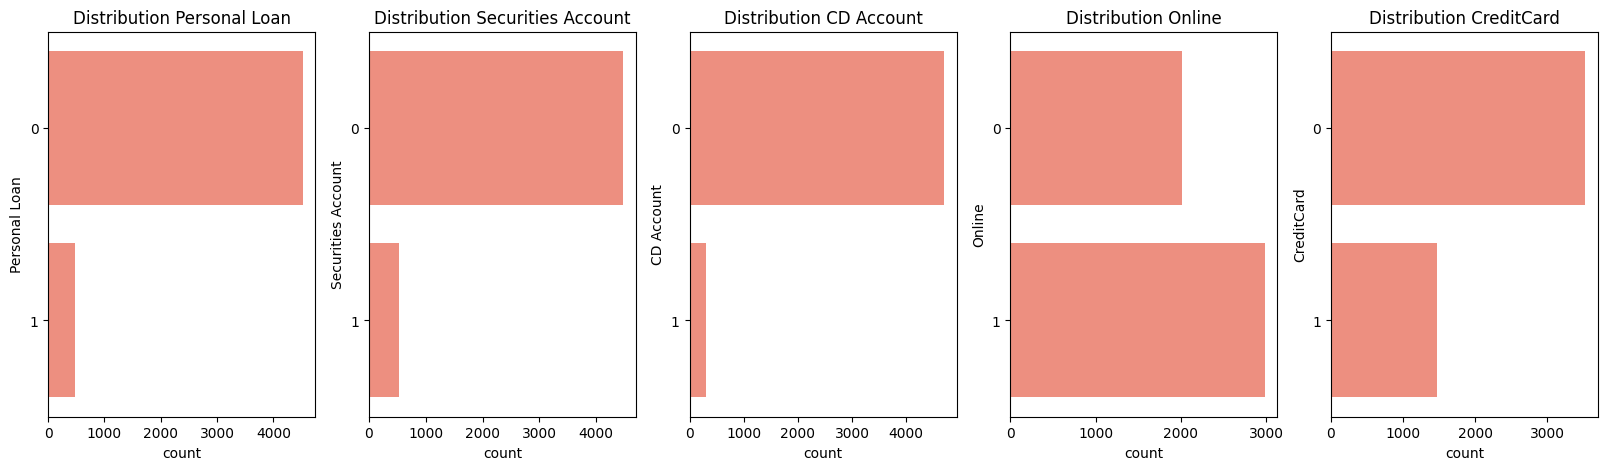

In [8]:
# Checking the distribution of the continuous features
fig, ax = plt.subplots(1, 5, figsize=(20,5))

# Original Distributions
for i, col in enumerate(bool_cols):
    chart = sns.countplot(data=df,y=df[col],ax=ax[i], color='#ff826e').set_title(f'Distribution {col}')
    abs_values = df[col].value_counts(ascending=False).values
    #chart.set_label(container=chart.containers[0], labels=abs_values)

Above analysis shows that dataset is imbalanced as No. of customers who did not opt personal load are too low as compare to the customers who opted Loan. Same analysis with other columns!

In [9]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Age -0.02934068151284029
Experience -0.026324688402384513
Income 0.8413386072610816
CCAvg 1.5984433366678663
Mortgage 2.1040023191079444


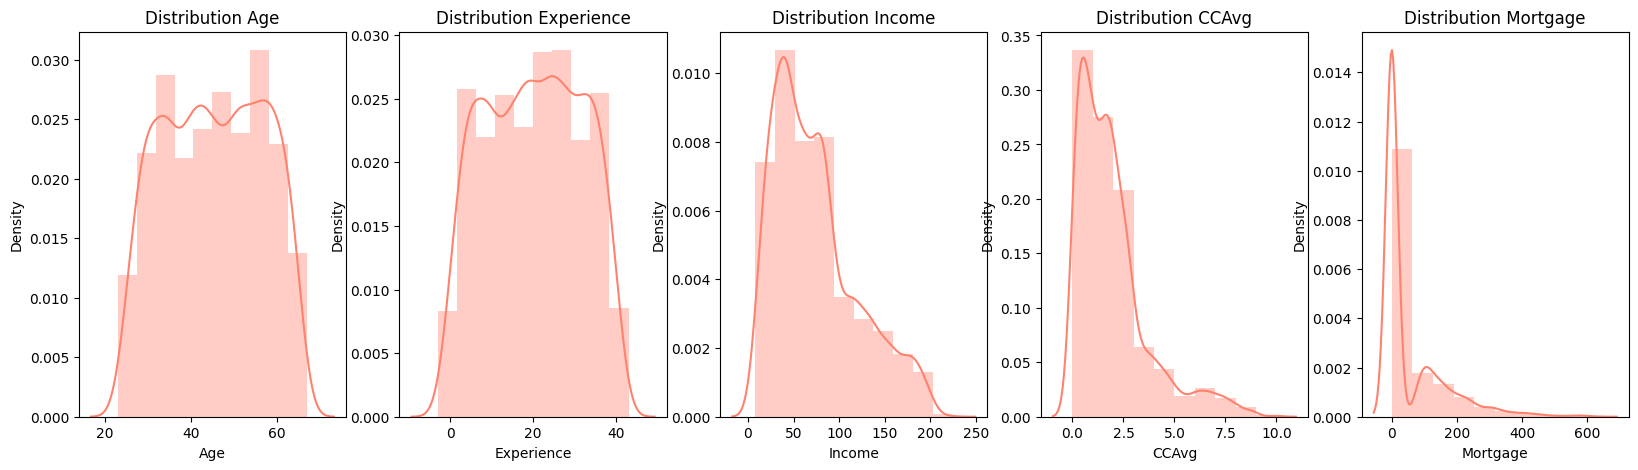

In [10]:
num_cols =  [ 'Age' , 'Experience' , 'Income' , 'CCAvg' , 'Mortgage']
fig, ax = plt.subplots(1, 5, figsize=(20,5))
import warnings
warnings.filterwarnings('ignore')
# Original Distributions
for i, col in enumerate(num_cols):
    chart = sns.distplot(a=df[col],ax=ax[i],bins=10, color='#ff826e').set_title(f'Distribution {col}')
    abs_values = df[col].value_counts(ascending=False).values
    print(col, df[col].skew())

Above analysis shows that Age & Experience features are very slightly negatively skewed. Rest otgher features are Positively Skewed. Also we can drop ID & ZIP Features from the dataset.

<AxesSubplot:>

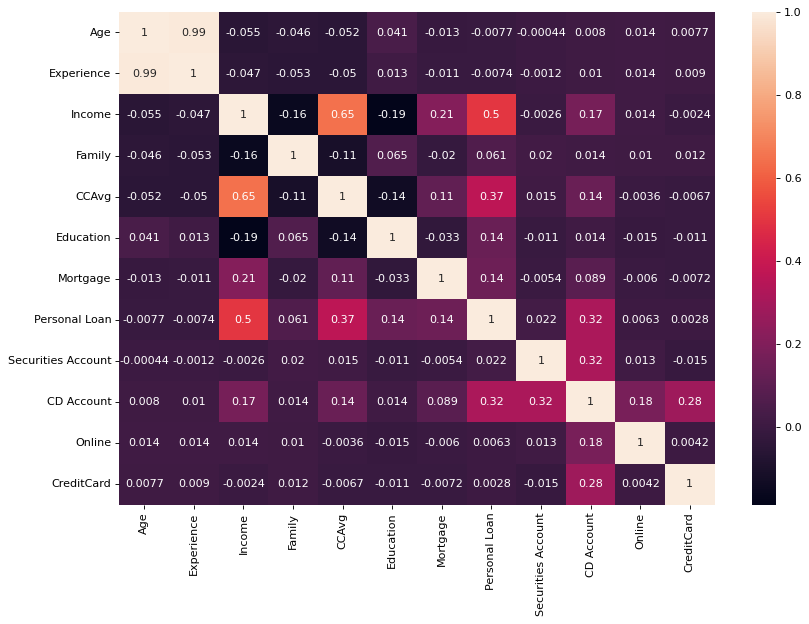

In [11]:
df.drop(columns=['ID','ZIP Code'],inplace=True)
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(df.corr(),annot=True)

Conclusion:

Personal Loan is highly correlated with Income, CD_Account, CCAvg.<br>
Experience is highly correlated with Age. (ρ = 0.99)<br>
CCAvg is correlated with Income to a good extent. (ρ = 0.58)<br>

### Data Cleansing, Noise Treatment

In [12]:
df.loc[df['Experience']<0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

Since the number of these noise values in the Experience feature is small, we assume that these values are incorrectly recorded as negative and replace them with their absolute value:

In [13]:
df['Experience'] = abs(df['Experience'])

In [14]:
df.sample(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2505,33,7,43,4,0.80,1,0,0,0,0,0,0
1512,53,28,44,3,1.70,1,0,0,0,0,0,0
1764,45,21,44,3,0.60,2,0,0,0,0,1,0
2036,46,19,19,3,0.67,2,0,0,0,0,1,0
762,32,6,85,1,2.70,2,100,0,0,0,1,0


#### Outliers Treatment

 Outliers are data points that are significantly higher or lower than most other values in the set.

Kurtosis is a measure of the "tailedness" or shape of a distribution. If the Kurtosis value is greater than 3, it is likely that the variable contains outliers. This is because excessive kurtosis indicates that the data points have a higher concentration in the tails than normal, which may indicate the presence of outliers.

In 3d step, of all the continuous features, only the Mortgage feature had a kurtosis value above 3. To detect possible outliers in this feature, we use Z-score technique.

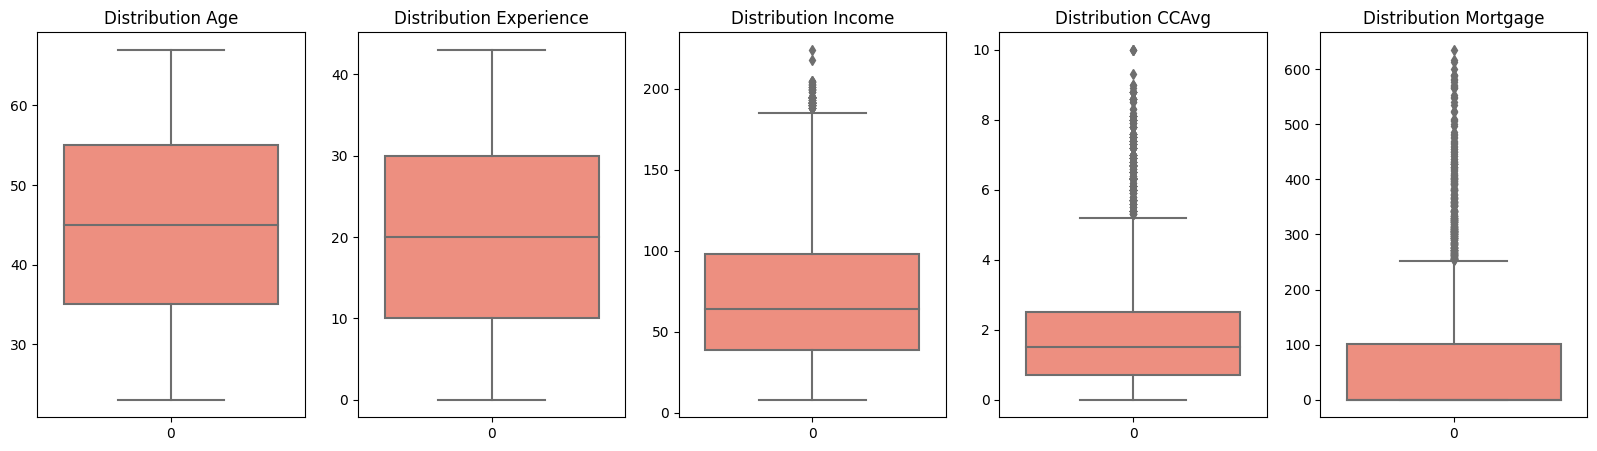

In [15]:
num_cols =  [ 'Age' , 'Experience' , 'Income' , 'CCAvg' , 'Mortgage']
fig, ax = plt.subplots(1, 5, figsize=(20,5))
import warnings
warnings.filterwarnings('ignore')
# Original Distributions
for i, col in enumerate(num_cols):
    chart = sns.boxplot(data=df[col],ax=ax[i], color='#ff826e').set_title(f'Distribution {col}')

Above analysis shows that out of 5 numerical features, three i.e., Income, CCAvg & Mortgage features have outliers! we need to work on these outliers. We will use IQR & ZScore Technique to identify outliers in the dataset

In [16]:
outliers_indexes = []
target = 'Personal Loan'

#For object features first we will fiter unique category in that column
#and then find q3 & q1 in respect to selling price column.

        
#For continuos column we will find out q3 & q1 in respect to that column itself        
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())
    
outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified based on IQR Method, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

602 outliers were identified based on IQR Method, whose indices are:

[9, 4105, 2059, 18, 4116, 22, 4122, 2074, 2076, 2077, 4125, 2087, 39, 4135, 42, 2090, 44, 47, 2098, 4147, 53, 2101, 55, 2103, 4151, 4153, 59, 4156, 61, 2109, 66, 4178, 4183, 90, 2144, 2149, 2159, 112, 119, 4225, 130, 131, 4238, 2191, 2190, 145, 4240, 2196, 150, 151, 2203, 160, 4256, 4258, 2215, 2217, 4267, 172, 174, 4271, 2226, 4276, 2231, 2232, 4282, 2235, 187, 4285, 194, 4292, 2246, 4294, 4301, 209, 4307, 4308, 4309, 213, 4310, 227, 2278, 4328, 4331, 242, 243, 2291, 4344, 248, 4345, 251, 2302, 2305, 4354, 4357, 2316, 2317, 2319, 4367, 2323, 4376, 288, 2337, 2338, 4386, 4388, 2341, 2342, 2345, 299, 301, 302, 303, 311, 2359, 4414, 4419, 324, 4422, 327, 329, 2377, 2379, 4425, 2382, 335, 338, 2394, 348, 2397, 351, 2400, 354, 361, 2410, 362, 365, 4470, 2422, 4471, 2428, 4480, 2434, 4483, 4484, 389, 2443, 2447, 400, 4498, 405, 2455, 2468, 2469, 422, 423, 2478, 432, 2486, 2490, 4541, 2498, 2500, 2502, 459, 462, 463, 2512,

In [17]:
outlier_indexes = df[stats.zscore(df['Mortgage'])>3].index
#df.drop(outlier_indexes, inplace=True)
#df.reset_index(drop=True, inplace=True)
len(outlier_indexes)

105

Above analysis shows that we are getting very high outliers from IQR method, so we will go ahead with Zscore technique. We will simply drop the outliers from Mortgage feature using zscore method.

In [18]:
outlier_indexes = df[stats.zscore(df['Mortgage'])>3].index
df.drop(outlier_indexes, inplace=True)
df.reset_index(drop=True, inplace=True)

In [19]:
df['CCAvg'] = df['CCAvg']*12

#### EDA - Bivariate & Multivariate Analysis

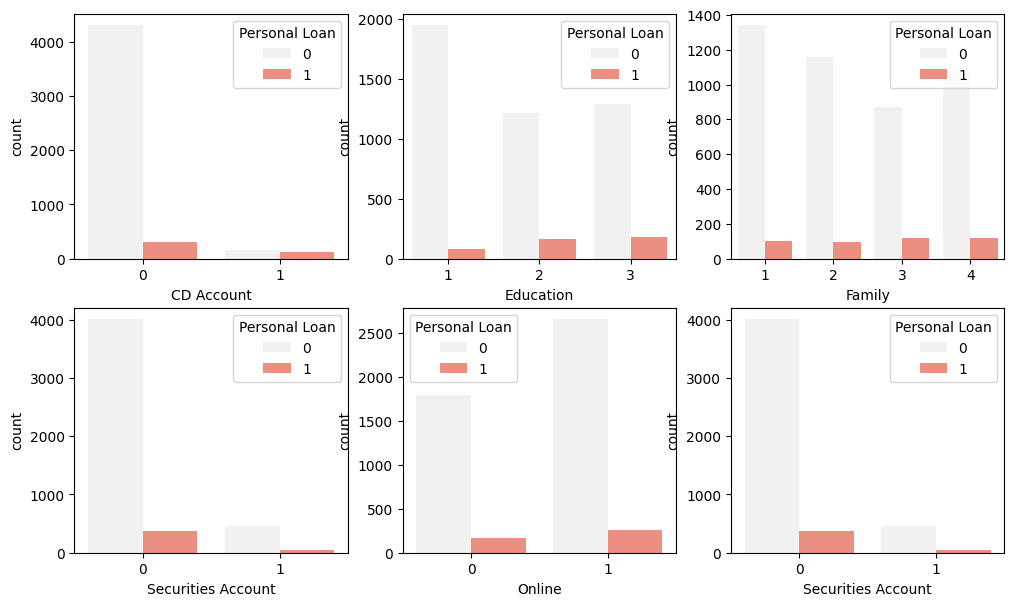

In [20]:
# Define a list containing the names of important categorical features in the dataset 
Cat_Features = ['CD Account','Education','Family','Securities Account','Online','Securities Account']

# Define the target name in a variable for simplicity
Target = 'Personal Loan'

fig, ax = plt.subplots(2, 3, figsize=(12,7))
import warnings
warnings.filterwarnings('ignore')
# Original Distributions
for i, col in enumerate(Cat_Features):
    if i<=2:
        chart = sns.countplot(data=df,x=col,ax=ax[0,i], color='#ff826e',hue=Target)
    else:
        chart = sns.countplot(data=df,x=col,ax=ax[1,i-3], color='#ff826e',hue=Target)
        
        

Conclusion:
The customer who has a certificate of deposit (CD) with the bank appears to buy personal loans from the bank.

Customers with higher levels of education are more likely to buy personal loans.

The number of family members has no significant effect on the probability of buying personal loans.

Customers who have or do not have a securities account at the bank have no influence on the probability of buying a personal loan.

The customer who uses or does not use internet banking does not seem to have any influence on the probability of buying a personal loan.

The customer who uses or does not use a credit card does not appear to have an impact on the likelihood of purchasing a personal loan.

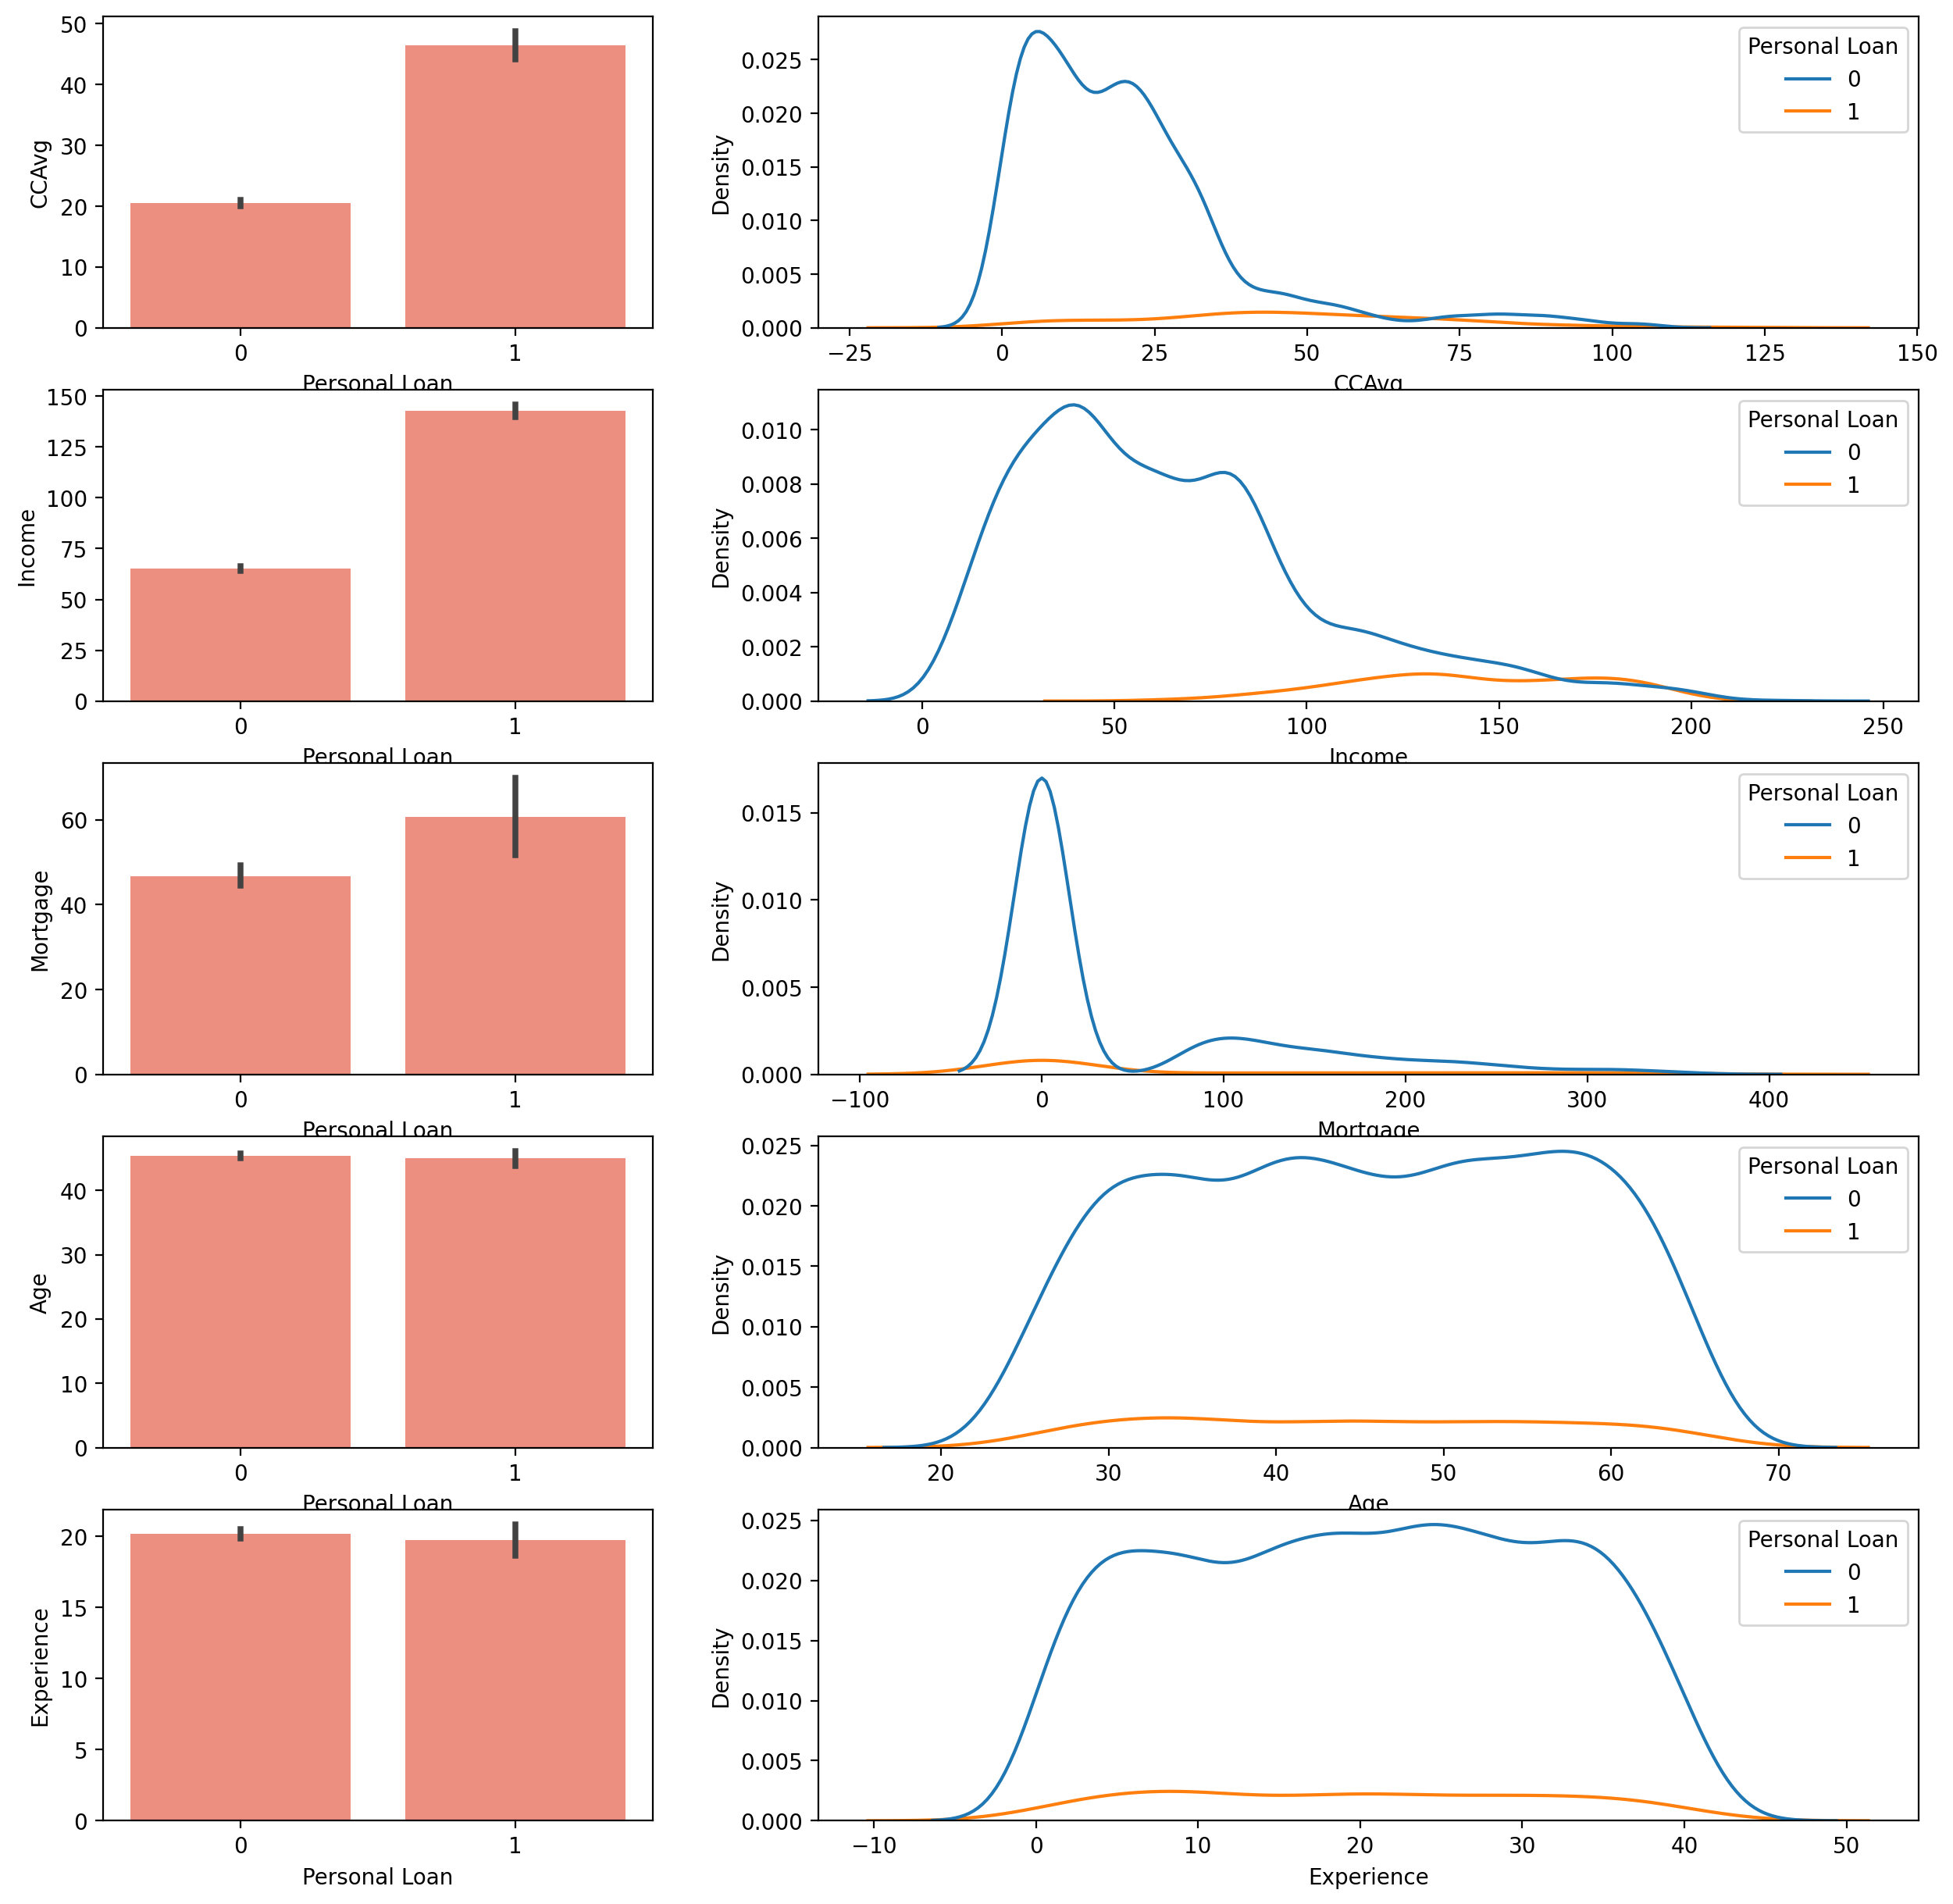

In [21]:
Num_Features = ['CCAvg','Income','Mortgage','Age','Experience']

# Define the target name in a variable for simplicity
Target = 'Personal Loan'

fig, ax = plt.subplots(5,2, figsize=(15,15), dpi=200, gridspec_kw={'width_ratios': [1, 2]})
import warnings
warnings.filterwarnings('ignore')
# Original Distributions
for i, col in enumerate(Num_Features):
    sns.barplot(data=df,x=Target,y=col,ax=ax[i,0], color='#ff826e')
    sns.kdeplot(data=df,x=col,ax=ax[i,1],hue=Target)    
        
        

Conclusion:
Customers who spend more on credit cards are more likely to take out personal loans.

Customers with high incomes are more likely to purchase a personal loan.

Customers with a high mortgage value are more likely to purchase personal loans.

It can be inferred that the age of customers has no influence on the probability of purchasing personal loans.

The effect of the amount of work experience on the purchase of a loan is similar to that of the age of the customer. The distribution of the Experience is very similar to the distribution of Age, as Experience is strongly correlated with Age.

Therefore, we remove Experience because it doesn't provide any more information than Age:

df.drop('Experience', axis=1, inplace=True)

In [22]:
df.drop('Experience', axis=1, inplace=True)

### Model Building

In [23]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'] 


Problems with Imbalanced Datasets:

- Imbalanced datasets can lead to algorithms that are biased towards the majority class. This means that any classification algorithm trained on an imbalanced dataset will often inaccurately classify minority classes as the majority class.

- The performance of a machine learning model can become highly skewed when it is fed with imbalanced data. For example, our dataset has 91.2% class 0 and 8.8% class 1, then the learning model could be easily optimized to just predict all test input as belonging to class 0 and still get 91.2% accuracy!

- If a model is trained on data which is heavily imbalanced, it can develop an incorrect understanding of the underlying trends in the data. The model may not be able to recognize how certain values are distributed among different classes or even how certain classes overlap with each other.

Techniques to Handle Imbalanced Dataset:

 The approach to train test split:

- The approach to train test split when dealing with imbalanced datasets is to use stratification. Stratification is an important step in splitting imbalanced datasets into training and test sets. Stratification ensures that the proportion of each class remains the same across both the training and test sets. This is important as it allows for a more accurate evaluation of the model, avoiding bias due to a disproportion of one class being over-represented in either dataset. Stratified sampling also ensures that any trends or correlations among different classes that exist within the overall dataset are preserved after splitting into training and test datasets:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

The approach for model evaluation:
- The approach for model evaluation when dealing with imbalanced datasets is to use appropriate metrics including recall, precision, F1 score and AUC(area under curve) that are better suited when dealing with imbalanced datasets instead of traditional accuracy metrics which don’t take into account class imbalance by default.

- In this project, the main goal is to classify potential customers who are more likely to purchase a loan. The metrics used to evaluate the performance of the model will be important in determining how well the model is able to identify these potential customers.

- Recall is a measure of the proportion of actual positive cases that were correctly identified by the model. A high recall score means that the model has a low number of false negatives, which is desirable in this project because it means that the model is not missing many potential loan customers.

- Precision is a measure of the proportion of positive cases identified by the model that are actually positive. A high precision score means that the model has a low number of false positives, which is desirable in this project because it means that the model is not identifying many non-loan customers as potential loan customers.

- F1-score is a measure of the trade-off between recall and precision. It is calculated as the harmonic mean of recall and precision. A high F1-score indicates a balance between high recall and high precision.

- For this project, both recall and precision for class '1' are important metrics, so f1-score for class '1' should be considered as the most important metric. A high f1-score indicates a balance between identifying as many potential loan customers as possible (high recall) and minimizing the number of false positives (high precision). This is important for the bank, as it wants to increase the conversion rate of depositors to borrowers while reducing the cost of the marketing campaign.

Model-based approaches:
- Penalize Algorithms: Penalize algorithms by giving more weight to a specific classification label, making correct classification of the minority class more important than correct classification of the majority class during optimisation process.
Use Tree-Based Algorithms: Tree-based algorithms like Random Forest, Extra Trees Classifiers and XGBoost can naturally handle imbalanced data because they make decisions based on a majority vote among randomized decision trees and do not require balancing classes before training.

Feature Selection Methods:

I) Wrapper Methods:

These methods use a predictive model to score each subset of features and determine the importance of each feature. Most important wrapper methods are:
- Forward Selection: Forward Selection is an iterative feature selection method that starts off with no features in the model and one by one adds the most predictive feature to the model, stopping when there is no improvement on a validation score. This process is repeated until certain criteria are met or all possible sets of features have been considered. By using a metric , the algorithm can identify which combinations of features best improve model performance. The result of Forward Selection is an ordered list that ranks the importance of each feature according to its contribution to improving model accuracy.
- Permutation: Permutation evaluates the influence of a given feature by shuffling its values and thereby creating a random permutation, measuring how much the model accuracy drops as consequence. The greater the drop in accuracy, the more important this feature proved to be for solving the task at hand.
- Drop-column: The idea is to calculate the model performance with all predictors and drop a single predictor and see the reduction in the performance. The more important the feature is, the larger the decrease we see in the model performance.

II) Filter Methods:
These methods use statistical measures such as:
- Correlation Coefficients
- Information Gain
- Chi-square Test

III) Embedded Methods:

Embedded methods combine elements of both filter and wrapper approaches by constructing predictive models during the feature selection process in order to better evaluate potential features. Examples of embedded methods include:
- LASSO Regression
- Decision Trees
- Random Forest
- Gradient Boosting Machines (GBM)

We will continue to use Drop-column Feature Importance method as it is actually the most accurate way to calculate the feature importances.

Note: Drop-column method does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model.

### Drop Column Method - Feature Selection

In [25]:
# Define a scorer function
def f1_metric(model, X_train, y_train):
    '''
    This function reports f1-score metric for the class specified by 'Positive Label' (or '1')
    '''
    return f1_score(y_train, model.predict(X_train), average='binary')

In [26]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    # list containing feature importances
    importances = []
    # Clone the model
    model_clone = clone(model)
    # Set random_state for comparability
    model_clone.random_state = random_state
    # Train the model
    model_clone.fit(X_train, y_train)
    # Create the cross-validation object using StratifiedKFold 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring=f1_metric).mean()

    
    # Iterate over all features and store feature importance
    for col in X_train.columns:
        # Clone the model
        model_clone = clone(model)
        # Set random_state for comparability
        model_clone.random_state = random_state
        # Traint the model on the the dataset with a single feature removed
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        # Score the droped-column model
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring=f1_metric).mean()
        # Store feature importance which is defined as the difference between the benchmark and the new model score
        importances.append(benchmark_score - drop_column_score)
        
    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)
           
    return importances_df                  

In [27]:
def drop_column_importance_plot(model, X_train, y_train):
    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']
    
    # Plot barchart
    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='royalblue')
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

Naive Bayes is a classification algorithm in machine learning. It is used to predict the probability of a given input belonging to different classes or categories. It is based on Bayes' theorem, which uses the prior probability of the class and the likelihood of the features given the class to calculate the posterior probability of the class. The class with the highest posterior probability is then chosen as the predicted class for the input. The Naive Bayes classifier algorithm makes several assumptions about the data and the problem it is being used to solve.

Naive Bayes Main Assumptions:
- Independence: The algorithm assumes that all the features in the data are independent of each other given the class. This is the "naive" part of the algorithm and is often unrealistic in real-world problems, but it allows for a computationally efficient solution.

- Conditional independence: The algorithm also assumes that the features are conditionally independent, meaning that the probability of a feature given the class is independent of the other features.

- Constant class prior: The algorithm assumes that the class prior probabilities are constant and do not change with the data.

Note: The Naive Bayes basic assumptions have been satisfied since only two features were highly correlated, Experience and Age, and the Experience feature had been removed earlier.

<b>Different types of Naive Bayes algorithms available in sklearn:</b>

- Gaussian Naive Bayes: This algorithm is used when the data is continuous and follows a normal distribution.

- Multinomial Naive Bayes: This algorithm is used when the data is discrete and represents the count of occurrences of each category.

- Bernoulli Naive Bayes: This algorithm is similar to the multinomial Naive Bayes, but it is used when the data is binary.

- Complement Naive Bayes: This algorithm is similar to the Multinomial Naive Bayes, but it is designed for imbalanced data sets.

- Categorical Naive Bayes: This algorithm is similar to the Multinomial Naive Bayes, but it is designed for categorical data, rather than count data.

In this project, our dataset contains a mixture of features with different distributions:

Continuous Features - Age, Income, CCAvg, Mortgage<br>
Binary Features - Securities Account, CD Account, Online, CreditCard<br>
Multinomial Features - Family<br>
Categorical Features - Education, ZIP Code<br>
Strategies:<br>

First strategy is to independently fit a Gaussian NB model on the continuous part of the data, a Complement NB model (imbalanced dataset) on the multinomial part of the data, a Bernoulli model on the bernoulli part of the data and a Categorical NB on the categorical part of the data. After fitting each model on the corresponding part of the dataset, then we actually transform the dataset by taking the class assignment probabilities (using predict_proba method) as new features and then refit a new Gaussian NB model on the new features.

Second strategy is to discretize continuous features and apply different discrete-data based Naive Bayes models, including Complement NB, and Bernoulli NB, in order to find the model with the best performance.

We will implement the second strategy because Income, CCAvg, and Mortgage are continuous features that are important features according to step 6.2, but their distribution is not normal and has high skewness and kurtosis, which causes a large error when performing Gaussian NB.

<br>
<br>
Multinomial NB is a probabilistic classifier that is commonly used in text classification tasks. It is based on the assumption that the features (e.g. words) in the text are conditionally independent given the class label. Multinomial NB models the probability of each feature given a class label using a multinomial distribution.

Complement NB is a variant of Multinomial NB algorithm that is designed to correct for the bias that is inherent in Multinomial NB algorithm. Multinomial NB algorithm tends to assign higher probability to classes that have more training samples. Complement NB aims to correct for this bias by computing the complement of the standard Naive Bayes probability estimates and then using these complement probabilities to make predictions.

Since our dataset is imbalanced, we will use CNB instead of MNB.

KBinsDiscretizer class from scikit-learn provides an implementation of discretization using the binning method. It allows us to choose between different number of bins (n_bins) and strategies for binning.

We will define a function containing GridSearchCV class to find the best combination of n_bins and strategy. In other words, we try all combinations of n_bins and strategy within the defined range and use the considered NB model to evaluate the discretizer's performance on the validation set in order to find the optimal combination:

In [28]:
df.sample(2)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1366,65,45,3,1.2,3,0,0,0,0,1,0
2734,52,35,4,21.6,1,0,0,0,0,1,0


# Complement Naive Bayes Algorithm

In [29]:
def discretization_report(df, clf):
    '''
    This function finds the optimal combination of n_bins and strategy for continuous features discretization
    '''
    # Define continuous features to perform discretization on
    cols_to_discretize = ['Age', 'Income', 'CCAvg', 'Mortgage']

    # Define the features (X) and the output labels (y) 
    X = df[cols_to_discretize]
    y = df['Personal Loan']

    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

    # Define the grid search parameters
    param_grid = {'discretizer__strategy': ['uniform', 'quantile', 'kmeans'],
                  'discretizer__n_bins': np.arange(2,11)}

    # Define the KBinsDiscretizer and OneHotEncoder and ComplementNB objects
    discretizer = KBinsDiscretizer(encode='ordinal')
    onehot = OneHotEncoder(handle_unknown='ignore', drop='first')

    # Create the pipeline
    pipeline = Pipeline([('discretizer', discretizer), ('onehot', onehot), ('clf', clf)])

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1')
    
    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the best score
    print("Best discretization parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    
    # Return optimal values for n_bins and strategy
    return grid_search.best_params_['discretizer__n_bins'], grid_search.best_params_['discretizer__strategy']

In [30]:
# Ignore a warning that in some cases, the width of the bins will be too small
warnings.simplefilter(action='ignore')

# Initialize the CNB classifier
cnb = ComplementNB()

# Call discretization_report
n_bins, strategy = discretization_report(df, cnb)

Best discretization parameters: {'discretizer__n_bins': 6, 'discretizer__strategy': 'uniform'}
Best score: 0.5218137864270942


The optimal values obtained for n_bins and strategy considering the CNB model are:

n_bins : 6
strategy : uniform (All bins in each feature have the same number of points)

In [31]:
def nb_feature_encoding(df, n_bins, strategy, cols_to_encode):
    '''
    This function performs dummy encoding on the desired categorical features after performing feature discretization 
    considering optimal n_bins and strategy values.
    '''
    # Define continuous features to perform discretization on
    cols_to_discretize = ['Age', 'Income', 'CCAvg', 'Mortgage']

    # Define the features (X) and the output labels (y) 
    X = df.drop('Personal Loan', axis=1)
    y = df['Personal Loan'] 

    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

    # Discretize the continuous features
    discretizer = KBinsDiscretizer(n_bins=n_bins, strategy=strategy, encode='ordinal')
    X_train[cols_to_discretize] = discretizer.fit_transform(X_train[cols_to_discretize])
    X_test[cols_to_discretize] = discretizer.transform(X_test[cols_to_discretize])

    # Onehot encode the discretized features
    X_train = pd.get_dummies(X_train, columns=cols_to_encode, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=cols_to_encode, drop_first=True)
    
    # Align the columns of the test set with the training set
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Return transformed features
    return X_train, X_test

In [32]:
# All non-binary features are selected for onehot encoding
cols_to_encode = ['Age', 'Income', 'CCAvg', 'Mortgage', 'Family', 'Education']

# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df, n_bins, strategy, cols_to_encode)

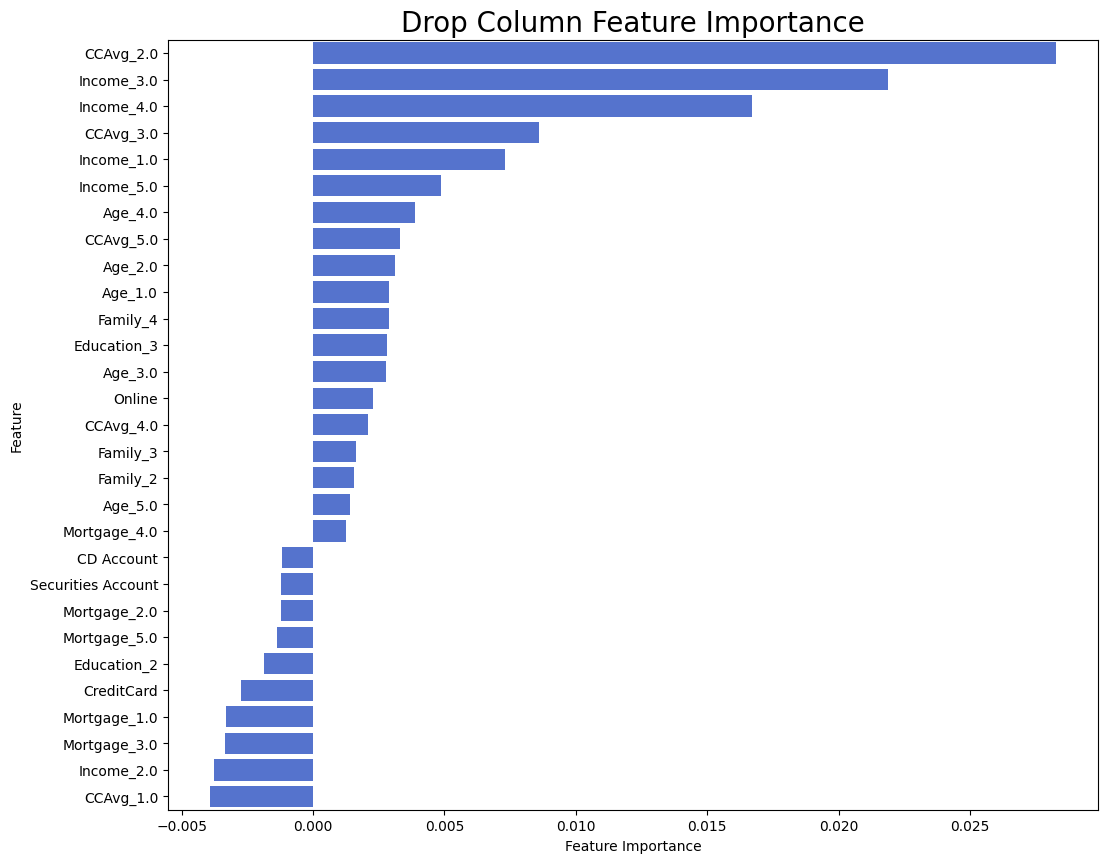

In [33]:
# Initialize the CNB classifier
cnb = ComplementNB()

# Call drop_column_importance_plot
drop_column_importance_plot(cnb, X_train, y_train)

Negative importance in Drop-column Feature Importance means that removing the corresponding feature from the model actually improves the model performance. So we filter our dataset:

In [34]:
feature_importances = drop_column_importance(cnb, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [35]:
#After removing irrelevant features, we train the final CNB model:
cnb = ComplementNB()
cnb.fit(X_train, y_train)

ComplementNB()

In [37]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [35]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Plot confusion matrix for test set
    # Define a colormap
    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show() 


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      3570
           1       0.37      0.91      0.53       346

    accuracy                           0.86      3916
   macro avg       0.68      0.88      0.72      3916
weighted avg       0.94      0.86      0.88      3916


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       892
           1       0.36      0.91      0.52        87

    accuracy                           0.85       979
   macro avg       0.68      0.88      0.71       979
weighted avg       0.93      0.85      0.88       979



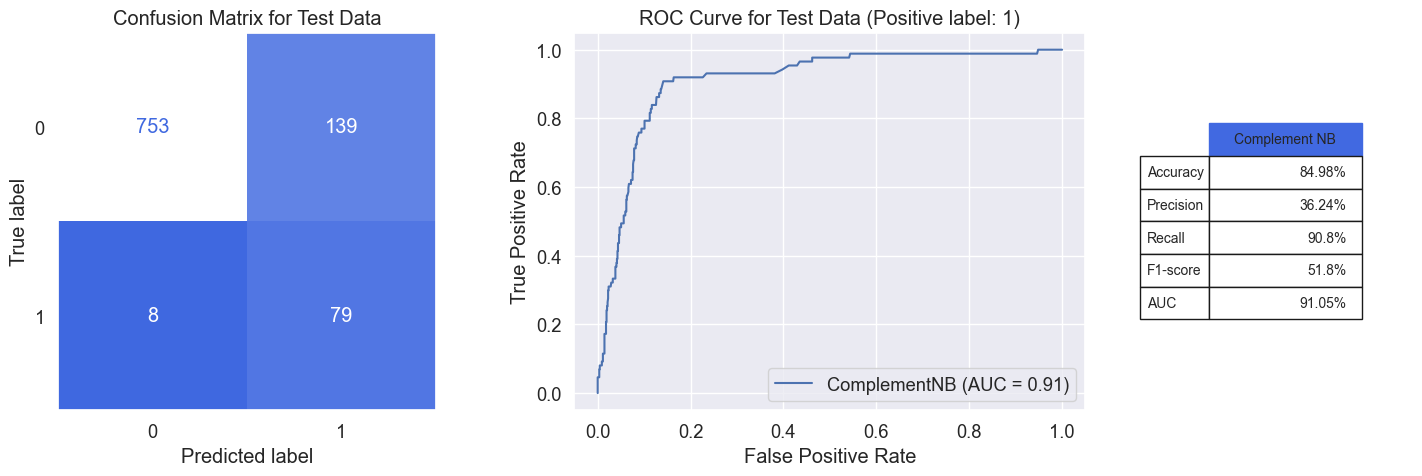

In [38]:
#Let's call the above function for evaluating our CNB model:
model_evaluation(cnb, X_train, X_test, y_train, y_test, 'Complement NB')

In [39]:
# Save the final performance of Complement Naive Bayes classifier
cnb_result = metrics_calculator(cnb, X_test, y_test, 'Complement Naive Bayes')
cnb_result

,Complement Naive Bayes
Accuracy,84.98%
Precision,36.24%
Recall,90.8%
F1-score,51.8%
AUC,91.05%


In [40]:
import pickle
pickle.dump(cnb,open('ComplementNaiveBayes.pkl','wb'))

## Logistic Regression Model Building

Logistic Regression is a type of supervised machine learning algorithm used for binary classification problems. It models the probability of a target variable (usually binary) as a function of input features, using a logistic function (sigmoid) to map predictions between 0 and 1. The model is trained using labeled data to optimize the coefficients of the features to minimize the prediction error.

#### Standard Scaler - Features

Before building our logistic classifier, we will apply Standard Scaler to our data.

Standard Scaler is used to scale the data. It transforms the data by subtracting the mean and dividing by the standard deviation, ensuring that all features have a similar range of values.

Benefits of Standard Scaling on Logistic Regression:
- Gradient Descent Convergence: The optimization algorithm used in logistic regression is gradient descent. When the features have different scales, the magnitude of the gradient will also be different for different features. Scaling the features to have the same scale ensures that the magnitude of the gradient is the same for all features, which can lead to faster convergence of the optimization algorithm.
- Regularization: Logistic regression uses regularization to prevent overfitting. When the features have different scales, the regularization term in the cost function tends to give more weight to the features with higher values, which can be problematic in certain cases. Scaling the features to have the same scale can alleviate this issue.
- Better Performance: In some cases, scaling the features can lead to a better performance of the logistic regression model, especially when the features have a skewed distribution or are not on the same scale.

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#### Hyperparameter Tuning in Logistic Regression

Hyperparameter tuning can affect the performance of a logistic regression model by allowing it to find the best combination of hyperparameters that result in the lowest error on the training set. This can lead to improved prediction performance and reduced overfitting. However, if not done, it can lead to overfitting on the validation set, resulting in a model that is not generalizable to new data.

Also, since our dataset is imbalanced, we intend to make the correct classification of the minority class more important than the correct classification of the majority class in the optimization process, which is called penalizing the model. We do this by giving more weight to the minority class. Therefore, the weights of the classes are hyperparameters whose optimal value is also determined during the Hyperparameter tuning process.

In [29]:
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,20)]

# Define hyperparameters grid
param_grid = [{'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 
               'penalty':['none'], 
               'class_weight':class_weights}, 
              
              {'solver':['lbfgs', 'newton-cg', 'sag'], 
               'penalty':['l2'], 
               'C': np.logspace(-5, 5, 10), 
               'class_weight':class_weights},
              
              {'solver':['liblinear', 'saga'], 
               'penalty': ['l1', 'l2'], 
               'C': np.logspace(-5, 5, 10), 
               'class_weight':class_weights},
              
              {'solver':['saga'], 
               'penalty':['elasticnet'], 
               'C': np.logspace(-5, 5, 10),
               'l1_ratio': np.arange(0,1.1,0.1), 
               'class_weight':class_weights}]

In [30]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):
    '''
    This function optimize the hyperparameters for a classifier by searching over a specified hyperparameter grid. It uses 
    GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters, and selects  
    the combination with the highest f1-score. The function returns the best classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=f1_metric, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train_scaled, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

In [31]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
    clf_grid = GridSearchCV(estimator=clf,param_grid=param_grid,cv=cv,scoring=f1_metric,n_jobs=-1)
    clf_grid.fit(X_train,y_train)
    print(f'Best Hypermarameters:\n',clf_grid.best_params_)
    return clf_grid.best_estimator_

In [45]:
# Define the base model
logreg = LogisticRegression(max_iter=1000)

# Call tune_clf_hyperparameters function to find the optimal combination of hyperparameters 
logreg_opt = tune_clf_hyperparameters(logreg, param_grid, X_train, y_train)

Best Hypermarameters:
 {'C': 3.593813663804626, 'class_weight': {0: 0.5, 1: 0.5}, 'penalty': 'l2', 'solver': 'lbfgs'}


In [46]:
logreg_opt

LogisticRegression(C=3.593813663804626, class_weight={0: 0.5, 1: 0.5},
                   max_iter=1000)

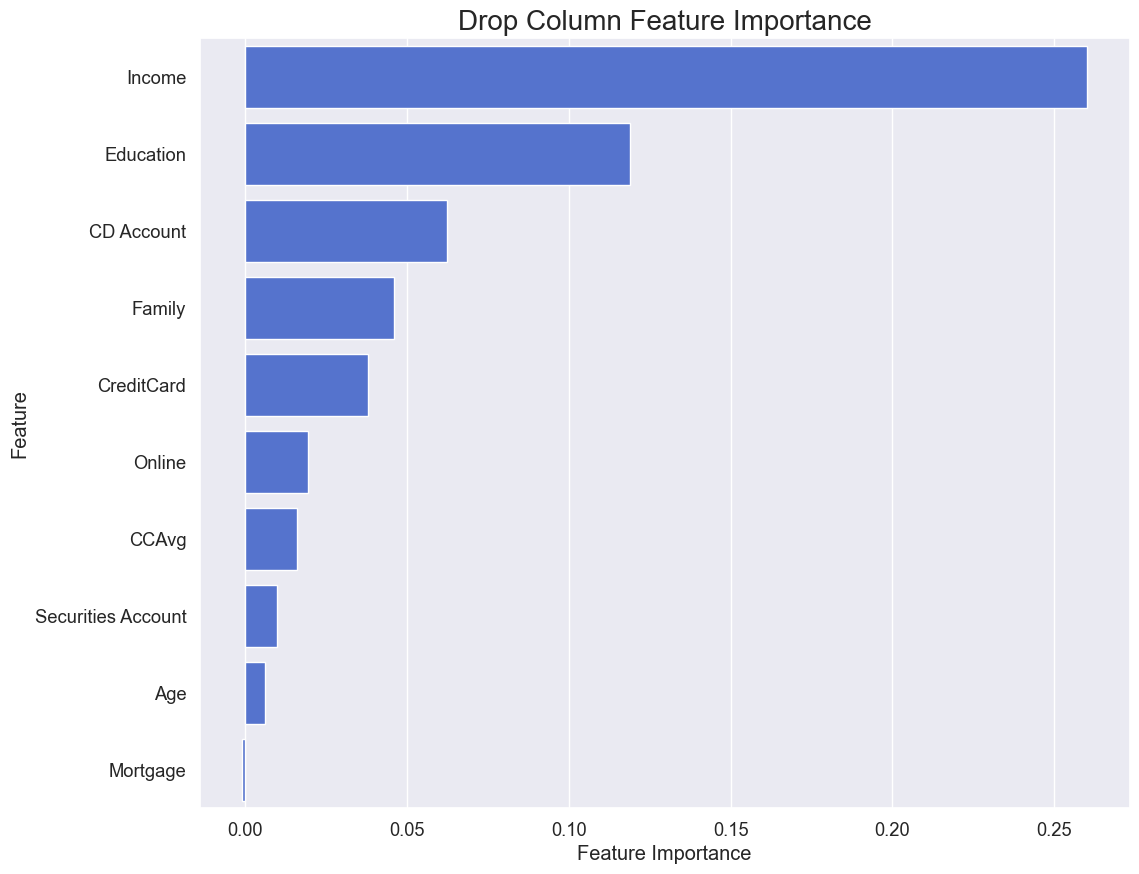

In [47]:
drop_column_importance_plot(logreg_opt, X_train, y_train)

Above analysis shows that there is no accuracy change while dropping any features in logistic regression model!


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3570
           1       0.84      0.63      0.72       346

    accuracy                           0.96      3916
   macro avg       0.90      0.81      0.85      3916
weighted avg       0.95      0.96      0.95      3916


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       892
           1       0.78      0.59      0.67        87

    accuracy                           0.95       979
   macro avg       0.87      0.79      0.82       979
weighted avg       0.94      0.95      0.95       979



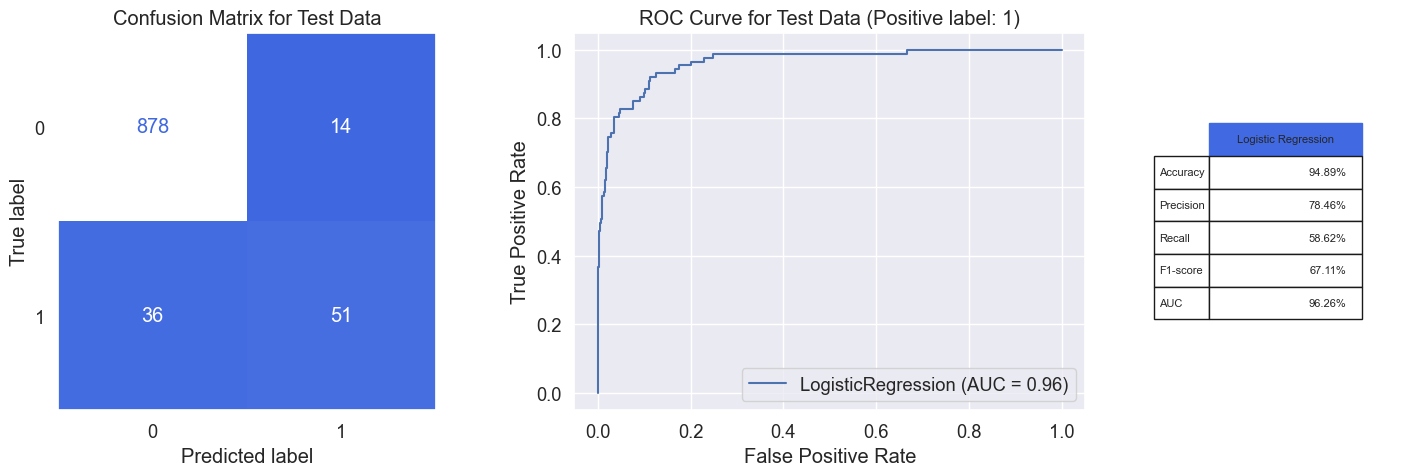

In [48]:
model_evaluation(logreg_opt, X_train, X_test, y_train, y_test, 'Logistic Regression')

A 10% increase in the F1-score of the logistic model compared to the NB Bernoulli model is observed, which is wonderful.

In [49]:
# Save the final performance of Logistic Regression classifier
logreg_result = metrics_calculator(logreg_opt, X_test, y_test, 'Logistic Regression')

In [50]:
pickle.dump(logreg_opt,open('LogisticRegressionModel.pkl','wb'))

## KNN Model Building

KNN (K-Nearest Neighbors) is a supervised learning algorithm used for classification and regression problems in machine learning. The algorithm works by finding the K nearest data points to a given test sample, and then classifying the test sample based on the majority class among the K nearest neighbors. The algorithm uses a distance metric (such as Euclidean distance) to determine the nearest neighbors. The value of K is a hyperparameter and determines the number of neighbors used to make the prediction.

Advantages:
- Easy to implement and understand.
- No need for training, it saves the training data and does not need to estimate parameters.
- Can be used for both classification and regression problems.

Disadvantages:
- It requires a large amount of memory to store the training data.
- Computationally expensive during prediction stage.
- Does not work well with high dimensional data as the distance metric becomes less effective.
- It can be biased towards the majority class.
- Sensitive to outliers.
- Sensitive to irrelevant features and noisy data. It's important to perform proper feature selection.

In [51]:
# Perform train test split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Define hyperparameters grid to search
param_grid = [{'n_neighbors': np.arange(2, 30), 'metric': ['euclidean','manhattan'], 'weights': ['uniform']},
              {'n_neighbors': np.arange(2, 30), 'metric': ['minkowski'], 'p': [3,4,5], 'weights': ['uniform']}]

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)

Best Hypermarameters:
 {'metric': 'minkowski', 'n_neighbors': 3, 'p': 5, 'weights': 'uniform'}


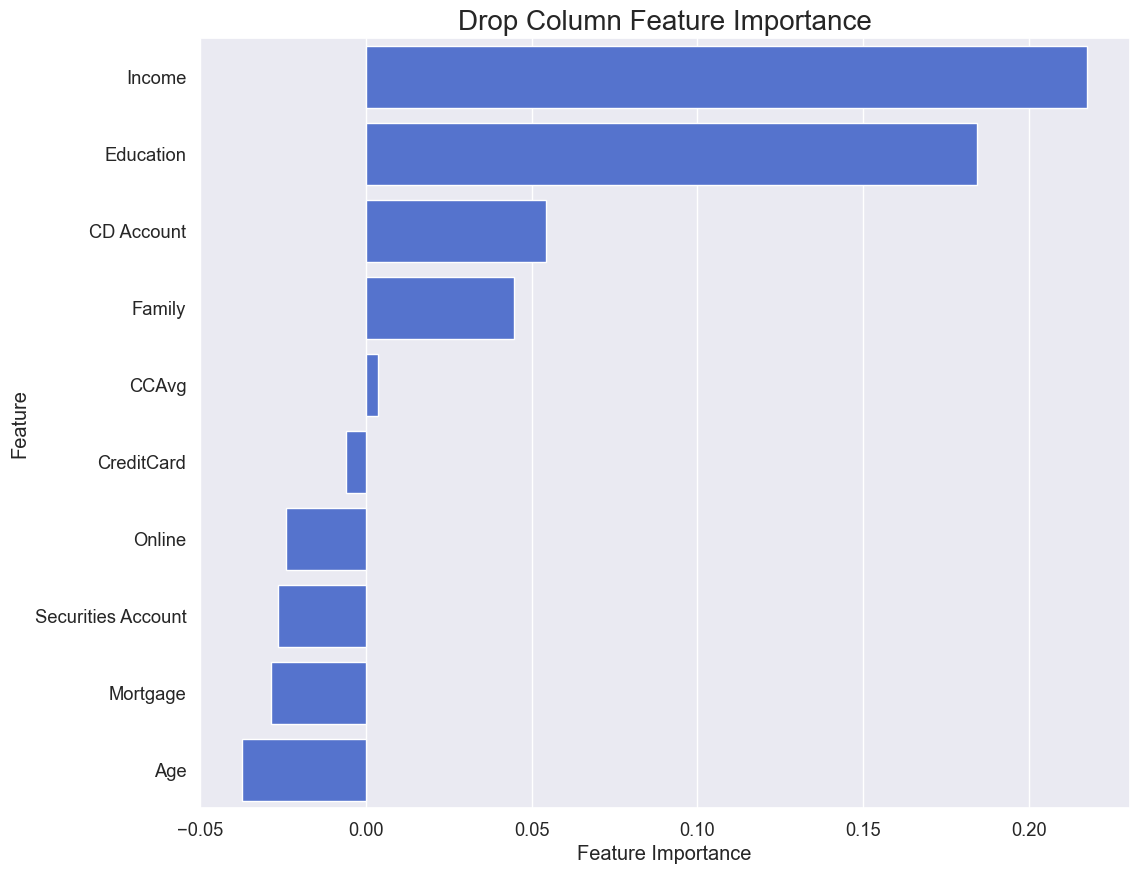

In [52]:
drop_column_importance_plot(knn_opt, X_train, y_train)

In the Drop-Column feature importance output results, several features with negative importance are observed. Removing these features improves the performance of the model. One of these features with the most negative importance value is the ZIP Code, which we already realized in the 3d step, that it is an unimportant feature due to its large number of categories. We filter our dataset:

Best Hypermarameters:
 {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3570
           1       0.98      0.90      0.94       346

    accuracy                           0.99      3916
   macro avg       0.99      0.95      0.97      3916
weighted avg       0.99      0.99      0.99      3916


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.96      0.86      0.91        87

    accuracy                           0.98       979
   macro avg       0.97      0.93      0.95       979
weighted avg       0.98      0.98      0.98       979



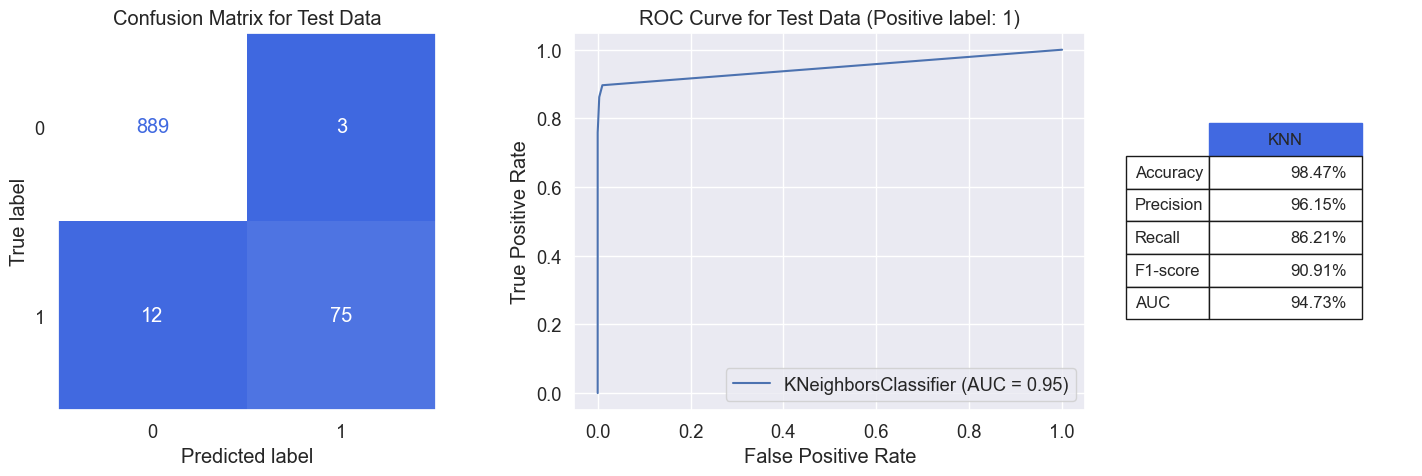

In [53]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(knn_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)
model_evaluation(knn_opt, X_train, X_test, y_train, y_test, 'KNN')

We got an astonishing 91% F1-score, 95% precision and 87% recall using the simple KNN classifier!

In [54]:
# Save the final performance of KNN classifier
knn_result = metrics_calculator(knn_opt, X_test, y_test, 'K-Nearest Neighbors')

In [55]:
pickle.dump(knn_opt,open('KNN.pkl','wb'))

## Support Vector Machine - Model Building

Support Vector Machine (SVM) is a type of supervised learning algorithm that is used for classification or regression tasks. It works by finding the best boundary (also known as the decision boundary) that separates the data points into classes, while maximizing the margin (the distance between the boundary and the closest data points from each class, known as support vectors). SVM can handle non-linearly separable data by transforming it into a higher-dimensional space, where it becomes linearly separable.

Advantages:
- Robust to outliers: SVM is less sensitive to outliers compared to other algorithms, making it suitable for tasks where the presence of outliers is expected.
- Versatile: SVM can be used for classification and regression tasks, as well as handling non-linear data through the use of kernel functions.
- Effective in high dimensional spaces: SVM is effective in higher dimensional spaces, where the number of features is greater than the number of samples.
- Good performance on smaller datasets: SVM has a good performance even on smaller datasets and it doesn't require a large amount of training data to produce accurate results.

Disadvantages:
- Poor performance on large datasets: SVM can be computationally intensive and may become slow when the dataset is large.
- Overfitting: SVM can overfit the data, especially when the number of features is much higher than the number of samples.
- Limited interpretability: SVM is a black-box model and it can be difficult to interpret the results and understand how the algorithm makes predictions.
- Difficulty in choosing the right kernel function: The choice of the kernel function is crucial for the performance of SVM and it can be difficult to determine the best one for a particular problem.

SVM classifiers can be sensitive to irrelevant features. If the input data contains irrelevant features, these features can negatively impact the performance of the SVM classifier. This is because the SVM algorithm considers all features equally when finding the decision boundary, and irrelevant features can distract the algorithm from finding the boundary that separates the classes effectively.

To avoid this issue, it is recommended to perform feature selection before training an SVM classifier, which involves removing any irrelevant or redundant features from the input data. This can improve the performance of the SVM classifier by reducing the complexity of the problem and allowing the algorithm to focus on the most relevant features.

In [ ]:
# Perform train test split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Define hyperparameters grid to search
param_grid = [{'kernel': ['poly'], 
               'degree': [2,3,4,5], 
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'C': [0.01,0.1,1, 10, 100, 1000],
               'class_weight': class_weights},
                  
              {'kernel': ['rbf','sigmoid'],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'C': [0.01,0.1,1, 10, 100, 1000],
               'class_weight': class_weights},
                  
              {'kernel': ['linear'],
               'C': [0.01,0.1,1, 10, 100, 1000],
               'class_weight': class_weights}
             ]

# Create a snm classifier object
svm = SVC()

# Find the best classifier with the optimal hyperparameters
svm_opt  = tune_clf_hyperparameters(svm, param_grid, X_train, y_train)

drop_column_importance_plot(svm_opt, X_train, y_train)

# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(svm_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']  # Threshold value of 0.01

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Create a SVC object
svm = SVC(probability=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
svm_opt = tune_clf_hyperparameters(svm, param_grid, X_train, y_train)

model_evaluation(svm_opt, X_train, X_test, y_train, y_test, 'SVM')

# Save the final performance of SVM classifier
svm_result = metrics_calculator(svm_opt, X_test, y_test, 'SVM')



## Decision Tree - Model Building

Decision Tree classifiers are prone to overfitting. This occurs when the tree is too complex and fits the training data too closely, capturing even the noise in the data.

Ways to prevent overfitting in decision tree classifiers:
- Pruning: Removing branches of the tree that do not contribute much to the classification.
- Using ensemble methods: Combining multiple decision trees to obtain a more robust model.
- Limiting tree size: Setting a minimum number of samples required to split an internal node or a maximum depth for the tree.

The following are the most common hyperparameters for Decision Tree Classifiers:
- Criterion: This hyperparameter determines the criterion used to measure the quality of a split. - - Commonly used criteria are "Gini Impurity" and "Information Gain".
- Maximum depth: This hyperparameter controls the maximum depth of the tree. The deeper the tree, the more complex it becomes, which can lead to overfitting. Setting a maximum depth can prevent overfitting by limiting the size of the tree.
- Minimum samples per split: This hyperparameter sets the minimum number of samples required to split an internal node. If the number of samples at a node is less than this value, the node cannot be split further. This can also prevent overfitting by limiting the size of the tree.
- Minimum samples per leaf: This hyperparameter sets the minimum number of samples required for a leaf node. If a leaf node has fewer samples than this value, it can be removed.
- Maximum features: This hyperparameter determines the maximum number of features to consider when splitting a node. It is used to prevent overfitting by reducing the complexity of the model.
- Class_weight: Weights associated with classes.

In [56]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]
    
# Define the hyperparameter grid
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(1, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2'],
              'class_weight': class_weights} 

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create a  Decision Tree Classifier object
dt = DecisionTreeClassifier(random_state=0)

# Find the best classifier with the optimal hyperparameters
dt_opt = tune_clf_hyperparameters(dt, param_grid, X_train, y_train)

Best Hypermarameters:
 {'class_weight': {0: 0.7371052631578947, 1: 0.2628947368421053}, 'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 8}


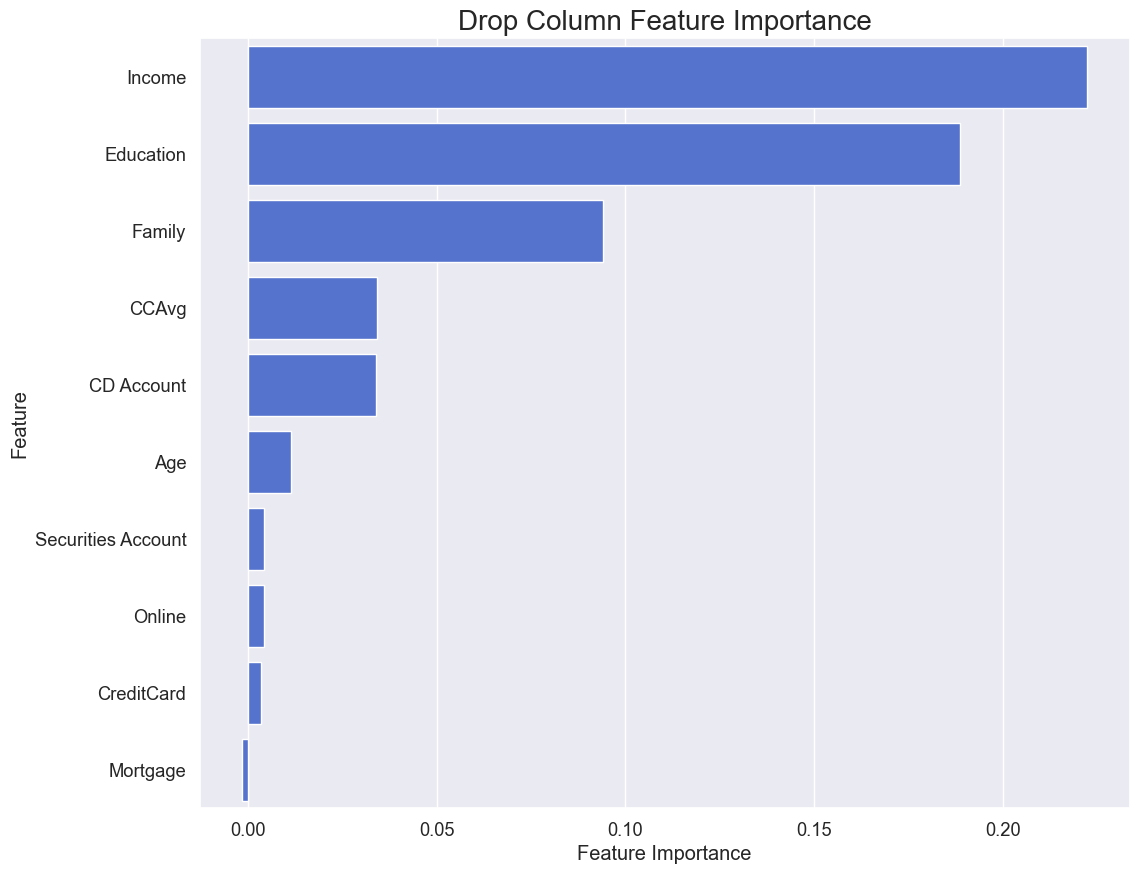

In [57]:
drop_column_importance_plot(dt_opt, X_train, y_train)

Best Hypermarameters:
 {'class_weight': {0: 0.8948421052631579, 1: 0.10515789473684212}, 'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3570
           1       1.00      0.93      0.97       346

    accuracy                           0.99      3916
   macro avg       1.00      0.97      0.98      3916
weighted avg       0.99      0.99      0.99      3916


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       892
           1       0.91      0.92      0.91        87

    accuracy                           0.98       979
   macro avg       0.95      0.96      0.95       979
weighted

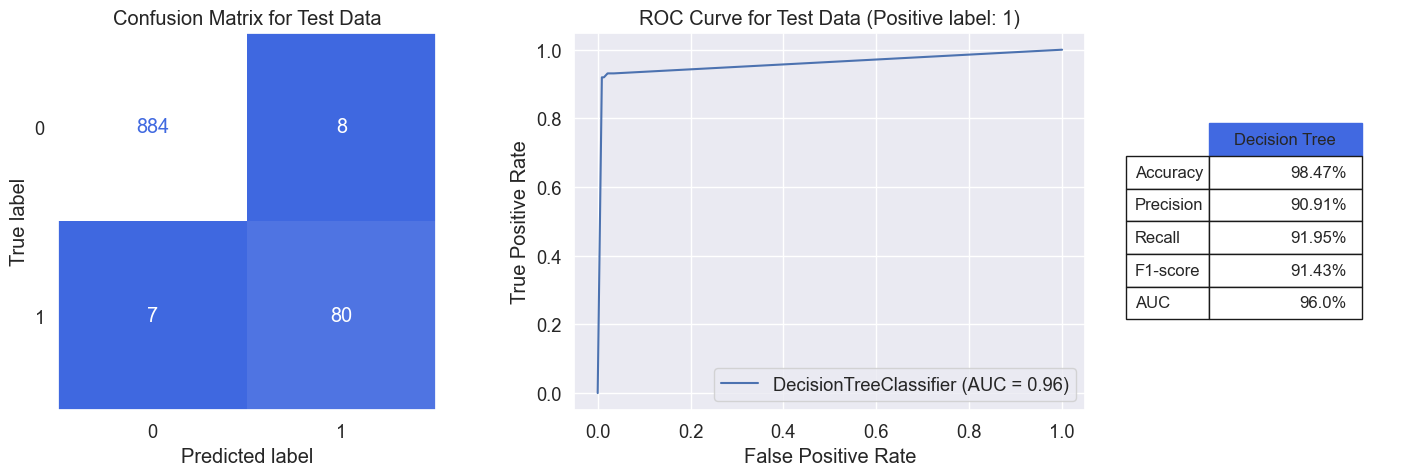

In [58]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(dt_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature'] # Threshold value of 0.01

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Create a  Decision Tree Classifier object
dt = DecisionTreeClassifier(random_state=0)

# Find the best classifier with the optimal hyperparameters
dt_opt = tune_clf_hyperparameters(dt, param_grid, X_train, y_train)

model_evaluation(dt_opt, X_train, X_test, y_train, y_test, 'Decision Tree')

For the decision tree classifier, we got 91% f1-score, similar to the previous two classifiers (KNN & SVM). If we examine the confusion matrix of these models, in all 3 cases, the sum of FN and FP values is equal to 15. In other words, out of 979 bank customers, the models made errors in 15 cases to predict whether the customer accepts the loan or not.

In [61]:
# Save the final performance of Decision Tree classifier
dt_result = metrics_calculator(dt_opt, X_test, y_test, 'Decision Tree')
dt_result

,Decision Tree
Accuracy,98.47%
Precision,90.91%
Recall,91.95%
F1-score,91.43%
AUC,96.0%


In [62]:
pickle.dump(dt_opt,open('DecisionTreeModel.pkl','wb'))

## Ensemble Learning

Ensemble learning is a machine learning technique that combines the predictions of multiple models to make more accurate and robust predictions. The idea behind ensemble learning is that by combining several models, or weak learners, to solve the same problem, the resulting ensemble model can perform better than any individual model. There are three main ensemble learning methods:

- Bagging stands for bootstrapped aggregating. In bagging, multiple instances of the same base model are trained in parallel on different bootstrapped samples of the data, and the results are aggregated through an averaging operation. Bagging is best suited for base models with low bias but high variance, as the averaging operation reduces the variance of the final ensemble model.
- Boosting is an iterative technique where multiple instances of the same base model are trained sequentially. At each iteration, the current weak learner is trained based on the previous weak learners and how well they performed on the data. Boosting is best suited for base models with low variance but high bias, as the iterative strategy of learning reduces the bias of the final ensemble model.
- Stacking is a technique where different base models are trained independently, and a meta-model is trained on top of that to predict outputs based on the outputs of the base models. In stacking, the base models are used as features for the meta-model, which makes the final predictions based on the combined information from all the base models.

The most important bagging models based on decision tree classifier are:
- Random Forest: Random forests are an ensemble learning method that utilizes decision trees as its base model. The trees in a random forest are grown on bootstrapped samples of the training data and a randomly selected subset of features. This helps reduce the correlation between the trees and makes the model more robust to missing data. The goal of random forests is to lower the variance of the model by combining multiple deep decision trees. The combination of bagging and random feature subspace selection results in a more robust and accurate model compared to individual decision trees.
- Extra Trees: Extra trees are an extension of random forests that use random splits instead of optimizing the splits based on information gain or other criteria. This makes extra trees faster to train than random forests and less prone to overfitting.
The most important boosting models are:
- Adaboost: This is one of the earliest and most popular boosting algorithms. It trains a series of weak decision trees and assigns more weight to the misclassified samples in each iteration.
- Gradient Boosting: This is a general purpose boosting algorithm that works well with a variety of weak models, including decision trees. It uses the gradient descent optimization method to minimize the loss function and find the best combination of weak models.
- XGBoost: This is an optimized implementation of gradient boosting and one of the most widely used algorithms in the machine learning community. It is known for its fast training speed, scalability, and ability to handle large datasets.
- LightGBM: This is another optimized implementation of gradient boosting that is designed for large datasets and has been widely adopted in industry.

In [63]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': np.arange(5, 12),
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': class_weights
}
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create a random forest classifier object
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
rf_opt = tune_clf_hyperparameters(rf, param_grid, X_train, y_train)

Best Hypermarameters:
 {'class_weight': {0: 0.7371052631578947, 1: 0.2628947368421053}, 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


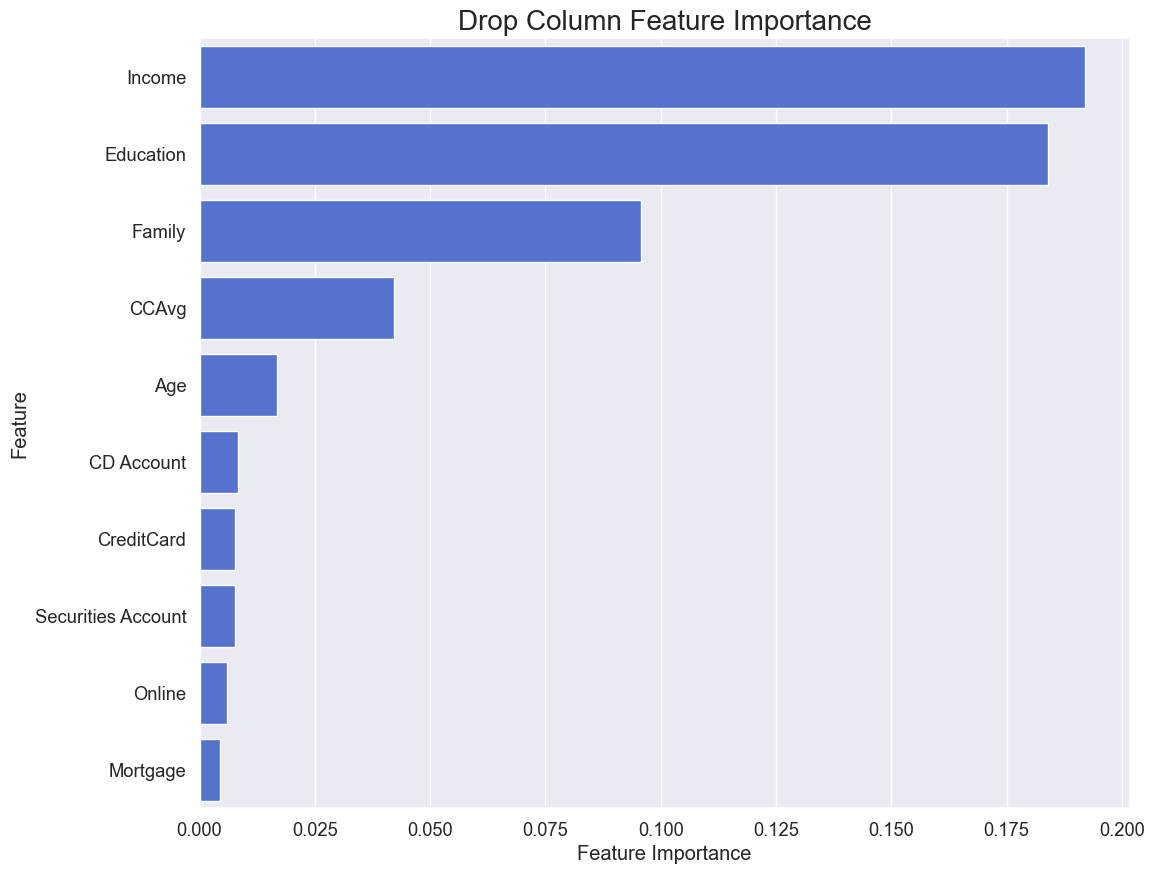

In [64]:
drop_column_importance_plot(rf_opt, X_train, y_train)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3570
           1       1.00      0.99      0.99       346

    accuracy                           1.00      3916
   macro avg       1.00      0.99      1.00      3916
weighted avg       1.00      1.00      1.00      3916


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       892
           1       0.92      0.91      0.91        87

    accuracy                           0.98       979
   macro avg       0.95      0.95      0.95       979
weighted avg       0.98      0.98      0.98       979



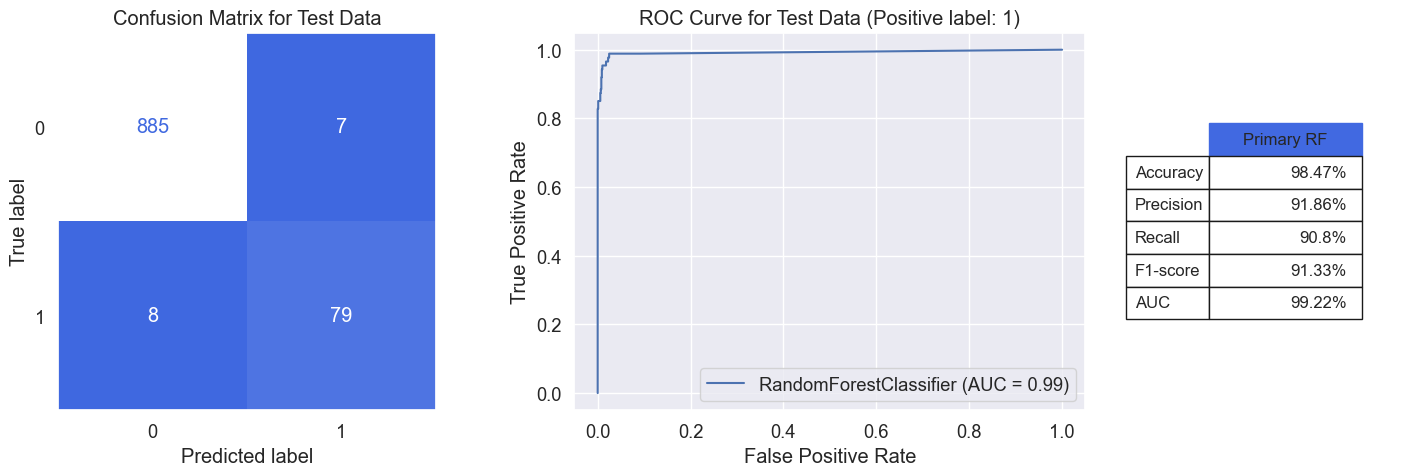

In [65]:
model_evaluation(rf_opt, X_train, X_test, y_train, y_test, 'Primary RF')

If we compare the values of precision, recall and f1-score for class 1 (more important class) on both training and test sets, we see a slight decrease in the scores on the test dataset compared to training, which shows that the model is fairly overfit. Overfitting of the model is due to its high variance, and in the following, we try to release the model from overfitting by applying a small change in the value of hyperparameters, hoping that the performance of the model will improve on the test data.

In [66]:
# Build random forest classifier object considering the obtained optimal values for hyperparameters
rf_final = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True,  n_estimators=100, 
                                  max_depth = 9,  min_samples_leaf=6, min_samples_split=2,
                                  class_weight={0: 0.58, 1: 0.42}, random_state=0)
                             
                            
# Train the final Random Forest model
rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.58, 1: 0.42}, max_depth=9,
                       max_features=None, min_samples_leaf=6, random_state=0)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3570
           1       0.98      0.91      0.94       346

    accuracy                           0.99      3916
   macro avg       0.98      0.95      0.97      3916
weighted avg       0.99      0.99      0.99      3916


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.97      0.90      0.93        87

    accuracy                           0.99       979
   macro avg       0.98      0.95      0.96       979
weighted avg       0.99      0.99      0.99       979



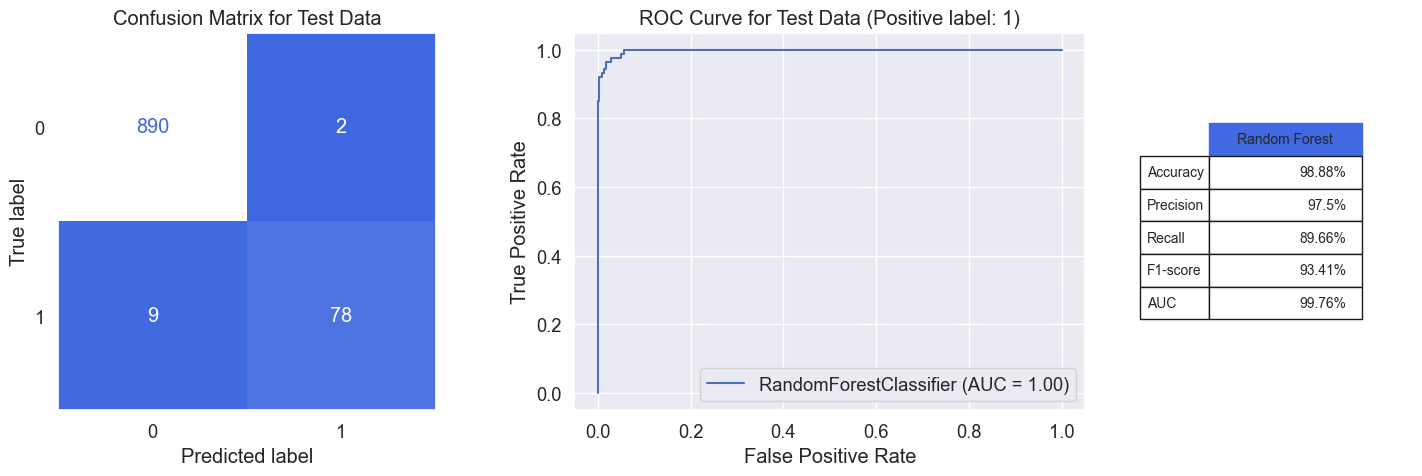

In [67]:
model_evaluation(rf_final, X_train, X_test, y_train, y_test, 'Random Forest')

We got the remarkable 94% f1-score with 99.81% AUC for our Random Forest classifier. Out of 979 bank customers, the model made errors just in 10 cases to predict whether the customer accepts the loan or not.

In [69]:
# Save the final performance of Random Forest classifier
rf_result = metrics_calculator(rf_final, X_test, y_test, 'Random Forest')
rf_result

,Random Forest
Accuracy,98.88%
Precision,97.5%
Recall,89.66%
F1-score,93.41%
AUC,99.76%


In [70]:
pickle.dump(rf_final,open('RandomForestModel.pkl','wb'))

In [72]:
df.to_csv('Cleaned.csv')

## Extra Trees -  Model Building

Extra Trees (Extremely Randomized Trees) is an ensemble learning method for classification and regression problems. It is a variation of the popular Random Forest algorithm and uses randomization in the construction of decision trees to create a forest of trees.

In a Random Forest, each tree in the ensemble is constructed using a random subset of the features and a random subset of the training samples. The final prediction is made by taking an average (for regression) or a majority vote (for classification) of the predictions made by all the trees in the ensemble. But in an Extra Trees classifier, each tree in the ensemble is constructed using a random subset of the training samples and a random threshold value is used for each feature to split the samples. This means that the Extra Trees classifier allows for more randomness in the construction of the trees compared to Random Forest, which can make Extra Trees more suitable for certain types of datasets.

Another difference between the two is that the Extra Trees classifier tends to have slightly higher variance compared to Random Forest, meaning it can be more prone to overfitting the training data. However, this higher variance can also lead to better performance on certain datasets, making Extra Trees a useful alternative to consider in some cases.

In [32]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [70, 100, 150], 
    'max_depth': [10,12,14],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,2,3],
    'class_weight': class_weights
}

#Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create a random forest classifier object
et = ExtraTreesClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
et_opt = tune_clf_hyperparameters(et, param_grid, X_train, y_train)

Best Hypermarameters:
 {'class_weight': {0: 0.8948421052631579, 1: 0.10515789473684212}, 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


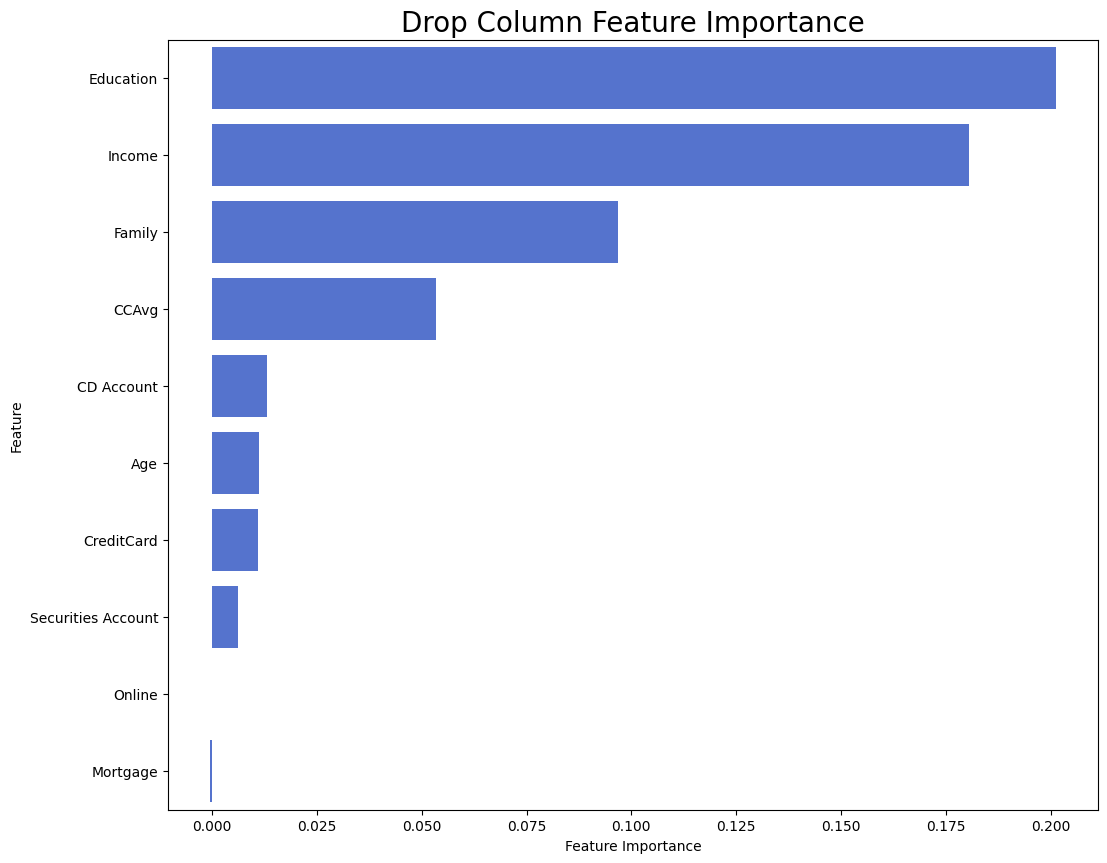

In [33]:
drop_column_importance_plot(et_opt, X_train, y_train)

Again, no negative values are observed among Drop-column Feature Importances. So, all features are effective in estimating the target and none of them are considered to be redundant.


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3570
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3916
   macro avg       1.00      1.00      1.00      3916
weighted avg       1.00      1.00      1.00      3916


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.96      0.92      0.94        87

    accuracy                           0.99       979
   macro avg       0.98      0.96      0.97       979
weighted avg       0.99      0.99      0.99       979



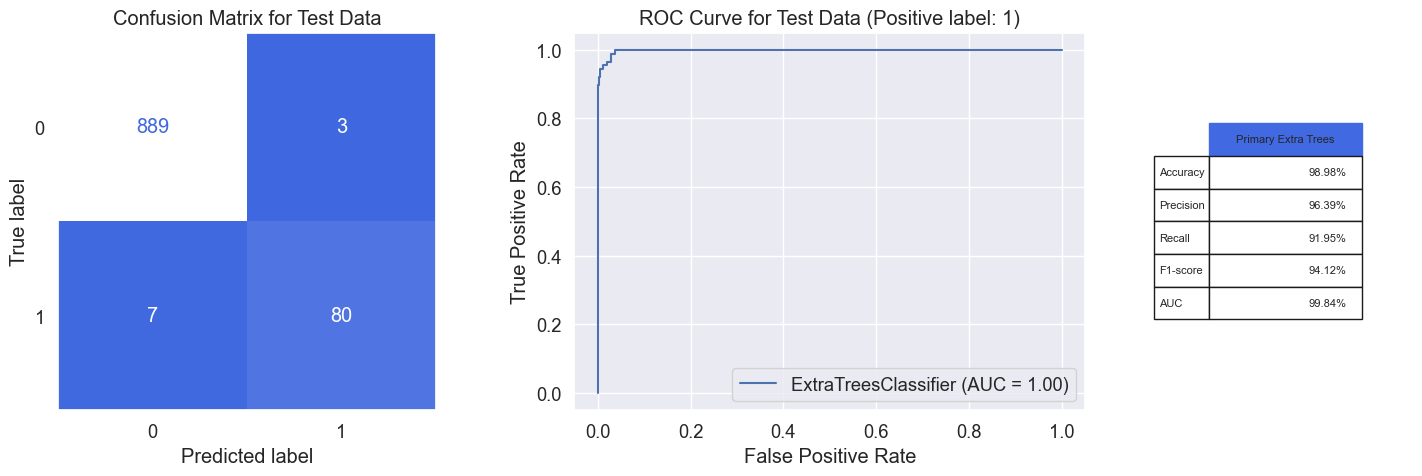

In [38]:
model_evaluation(et_opt, X_train, X_test, y_train, y_test, 'Primary Extra Trees')

The comparison of precision, recall, and f1-score for class 1 between the training and test datasets suggests that the model is slightly overfit. If the values for class 1 show a significant decrease in performance on the test set compared to the training set, it indicates that the model has learned the training data too well and has not generalized well to new unseen data. This overfitting leads to a poor performance on the test set and suggests that the model is not suitable for making accurate predictions on new data.

Based on the explanation given in section 15.3, by increasing the value of min_samples_leaf from 2 to 3, the model becomes less complex and the variance of the model is reduced:

In [39]:
# Build Extra Trees classifier object considering the obtained optimal values for hyperparameters
et_final = ExtraTreesClassifier(criterion='gini', max_features=None, bootstrap=True,  n_estimators=70, 
                                max_depth = 14,  min_samples_leaf=1, min_samples_split=3,
                                class_weight= {0: 0.95, 1: 0.05}, random_state=0)
                             
                            
# Train the final Extra Trees model
et_final.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, class_weight={0: 0.95, 1: 0.05},
                     max_depth=14, max_features=None, min_samples_split=3,
                     n_estimators=70, random_state=0)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3570
           1       1.00      0.96      0.98       346

    accuracy                           1.00      3916
   macro avg       1.00      0.98      0.99      3916
weighted avg       1.00      1.00      1.00      3916


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.98      0.92      0.95        87

    accuracy                           0.99       979
   macro avg       0.98      0.96      0.97       979
weighted avg       0.99      0.99      0.99       979



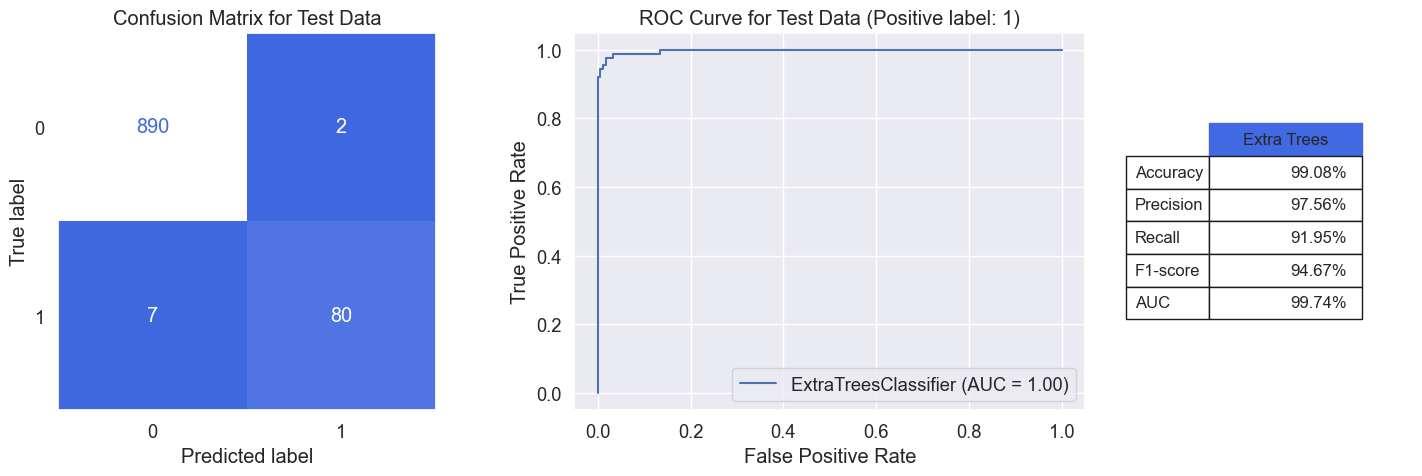

In [40]:
model_evaluation(et_final, X_train, X_test, y_train, y_test, 'Extra Trees')

As can be seen, the model is no longer overfit and the performance of the model on the test data has improved compared to the previous model. We got the astonishing 95% f1-score with 99.84% AUC for our Extra Trees classifier which is our best classifier till now. Out of 979 bank customers, the model made errors just in 8 cases to predict whether the customer accepts the loan or not.

In [41]:
# Save the final performance of Extra Trees classifier
et_result = metrics_calculator(et_final, X_test, y_test, 'Extra Trees')
et_result

,Extra Trees
Accuracy,99.08%
Precision,97.56%
Recall,91.95%
F1-score,94.67%
AUC,99.74%


In [42]:
import pickle
pickle.dump(et_final,open('ExtraTreeClassifier.pkl','wb'))

## AdaBoost Model Building

AdaBoost (Adaptive Boosting) is a popular boosting ensemble learning algorithm that is used for classification and regression tasks. It combines multiple "weak" classifiers to create a strong classifier that makes accurate predictions. The weak classifiers are trained one by one and the algorithm adjusts the weights of the training instances based on their misclassification rates. The idea behind AdaBoost is to focus on the samples that are misclassified by the previous weak classifiers, so that the subsequent weak classifiers can do a better job in classifying those samples. In this way, the algorithm tries to improve the overall accuracy of the classifier by combining the outputs of multiple weak classifiers.

The term "weak classifier" refers to a simple classifier that is not highly accurate, but when combined with other weak classifiers, results in a strong overall classifier. Typically, decision trees are used as the weak classifiers in AdaBoost. However, any machine learning algorithm that accepts weights on the training data can be used as the base learner in AdaBoost.

In [43]:
# Define the hyperparameter grid for AdaBoost
ada_param_grid = {
    'base_estimator__max_depth': [3, 5, 7],
    'base_estimator__min_samples_split': [3, 5, 7],
    'base_estimator__min_samples_leaf': [1, 2, 3],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.8, 0.9, 1]
}

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create the Decision Tree classifier as the base estimator
dt = DecisionTreeClassifier(criterion='gini', max_features=None, random_state=0)

# Create the AdaBoost classifier using Decision Tree as base estimator
ada = AdaBoostClassifier(base_estimator=dt, random_state=0)

# Find the best AdaBoost classifier with the optimal hyperparameters
ada_opt = tune_clf_hyperparameters(ada, ada_param_grid, X_train, y_train)

Best Hypermarameters:
 {'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 3, 'learning_rate': 1, 'n_estimators': 50}


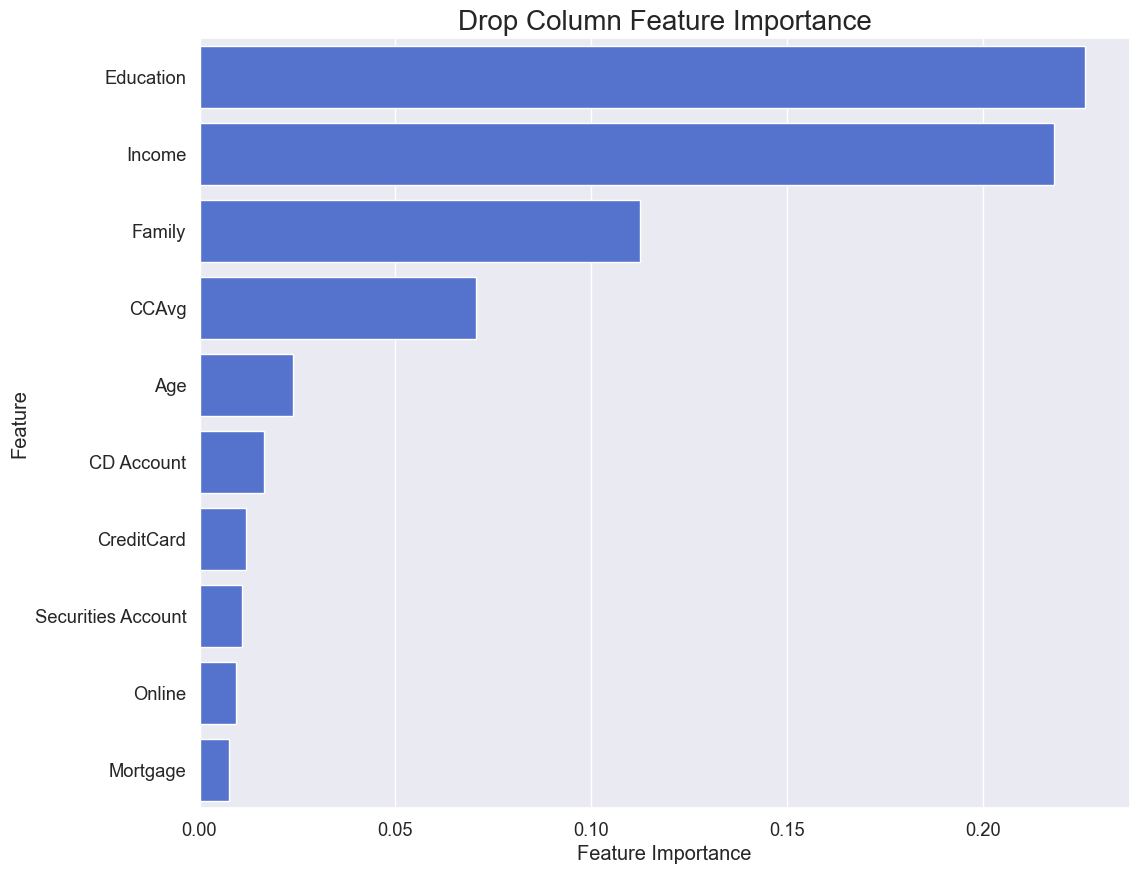

In [44]:
drop_column_importance_plot(ada_opt, X_train, y_train)



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3570
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3916
   macro avg       1.00      1.00      1.00      3916
weighted avg       1.00      1.00      1.00      3916


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.99      0.91      0.95        87

    accuracy                           0.99       979
   macro avg       0.99      0.95      0.97       979
weighted avg       0.99      0.99      0.99       979



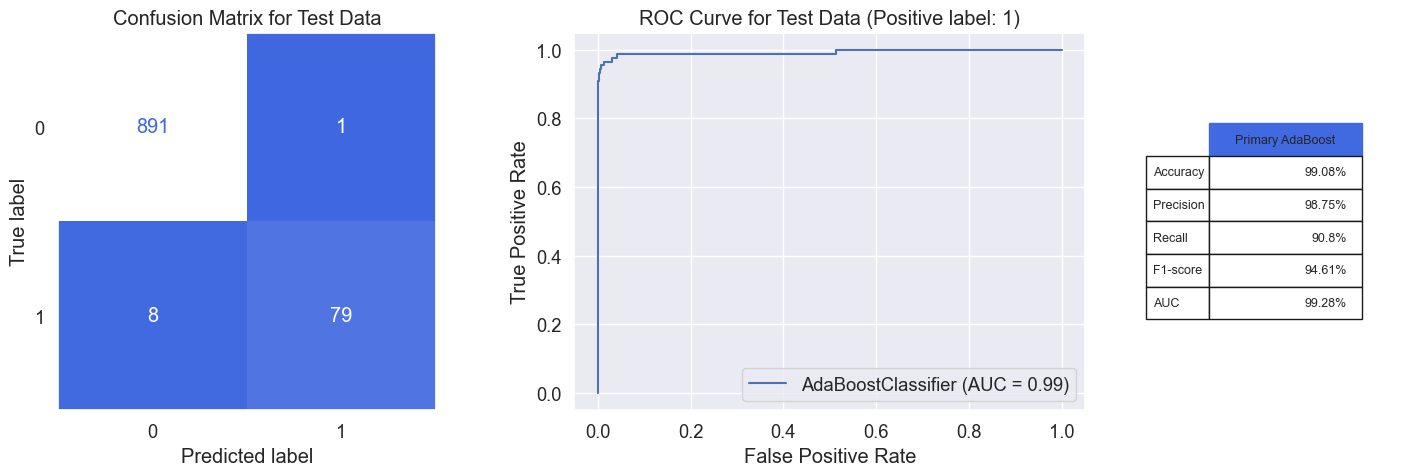

In [45]:
model_evaluation(ada_opt, X_train, X_test, y_train, y_test, 'Primary AdaBoost')

Performance metrics for the minority class on the test data show that the model is not overfitting completely, but may not be the best model for the problem. Overfitting of the classifier is due to its high variance, and to avoid overfitting, we can try regularization techniques, which means applying a small change in the value of hyperparameters to reduce the variance of the classifi

In [48]:
# Create the Decision Tree classifier as the base estimator
dt = DecisionTreeClassifier(criterion='gini', max_features=None, random_state=0, max_depth=5, min_samples_leaf=2, min_samples_split=5)

# Create the AdaBoost classifier using Decision Tree as base estimator
ada_final = AdaBoostClassifier(base_estimator=dt, random_state=0, learning_rate=0.8, n_estimators=100)

# Train the final AdaBoost classifier
ada_final.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         min_samples_leaf=2,
                                                         min_samples_split=5,
                                                         random_state=0),
                   learning_rate=0.8, n_estimators=100, random_state=0)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3570
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3916
   macro avg       1.00      1.00      1.00      3916
weighted avg       1.00      1.00      1.00      3916


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.95      0.93      0.94        87

    accuracy                           0.99       979
   macro avg       0.97      0.96      0.97       979
weighted avg       0.99      0.99      0.99       979



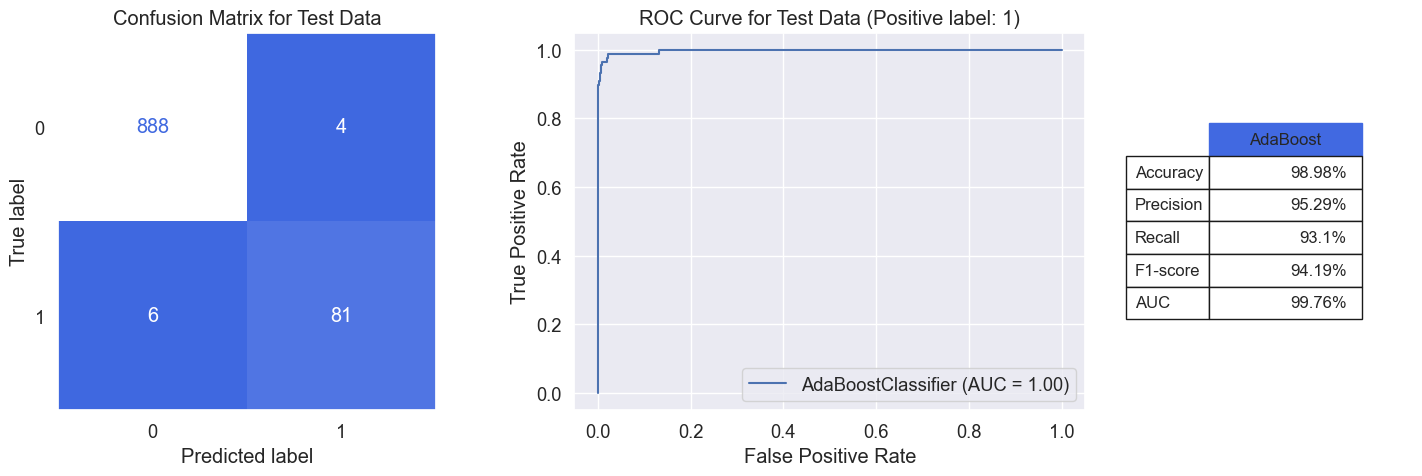

In [49]:
model_evaluation(ada_final, X_train, X_test, y_train, y_test, 'AdaBoost')

Note: The AUC (Area Under Curve) metric measures the performance of a binary classifier by plotting the true positive rate against the false positive rate and calculating the area under the curve. A model that is not overfit will have a high AUC, close to 1, indicating that it has a good balance between true positive and false positive predictions. A model that is overfitting, on the other hand, may have a high accuracy on the training set but a lower AUC on the validation set, as it may be making many false positive predictions. Hence, a high AUC score suggests that the model is not overfitting and has good generalization performance on new, unseen data.

In [51]:
# Save the final performance of AdaBoost classifier
ada_result = metrics_calculator(ada_final, X_test, y_test, 'AdaBoost')
ada_result

,AdaBoost
Accuracy,98.98%
Precision,95.29%
Recall,93.1%
F1-score,94.19%
AUC,99.76%


In [52]:
pickle.dump(ada_final,open('AdaboostModel.pkl','wb'))

## Gradient Boosting - Model Building

Gradient Boosting is an ensemble machine learning technique for classification and regression problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise manner, where each subsequent model tries to correct the mistakes of the previous model. The algorithm iteratively trains decision trees in such a way that the trees are able to fit the negative gradient of the loss function being optimized. The final prediction is made by combining the outputs of all the individual trees.

Note : The implementation of Gradient Boosting Classifier in scikit-learn's ensemble module (sklearn.ensemble.GradientBoostingClassifier) is based on decision tree as the base estimator.

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
    clf_grid = RandomizedSearchCV(estimator=clf,param_distributions=param_grid,cv=cv,scoring=f1_metric,n_jobs=-1)
    clf_grid.fit(X_train,y_train)
    print(f'Best Hypermarameters:\n',clf_grid.best_params_)
    return clf_grid.best_estimator_

In [61]:
# Define the hyperparameter grid for tuning
gbc_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'loss': ['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'squared_error'],
    'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(max_features=None, loss='deviance', criterion='friedman_mse', random_state=0)

# Find the best hyperparameters from the tuning process
gbc_opt = tune_clf_hyperparameters(gbc, gbc_param_grid, X_train, y_train)

Best Hypermarameters:
 {'subsample': 0.5, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 5, 'loss': 'deviance', 'learning_rate': 0.1, 'criterion': 'squared_error'}


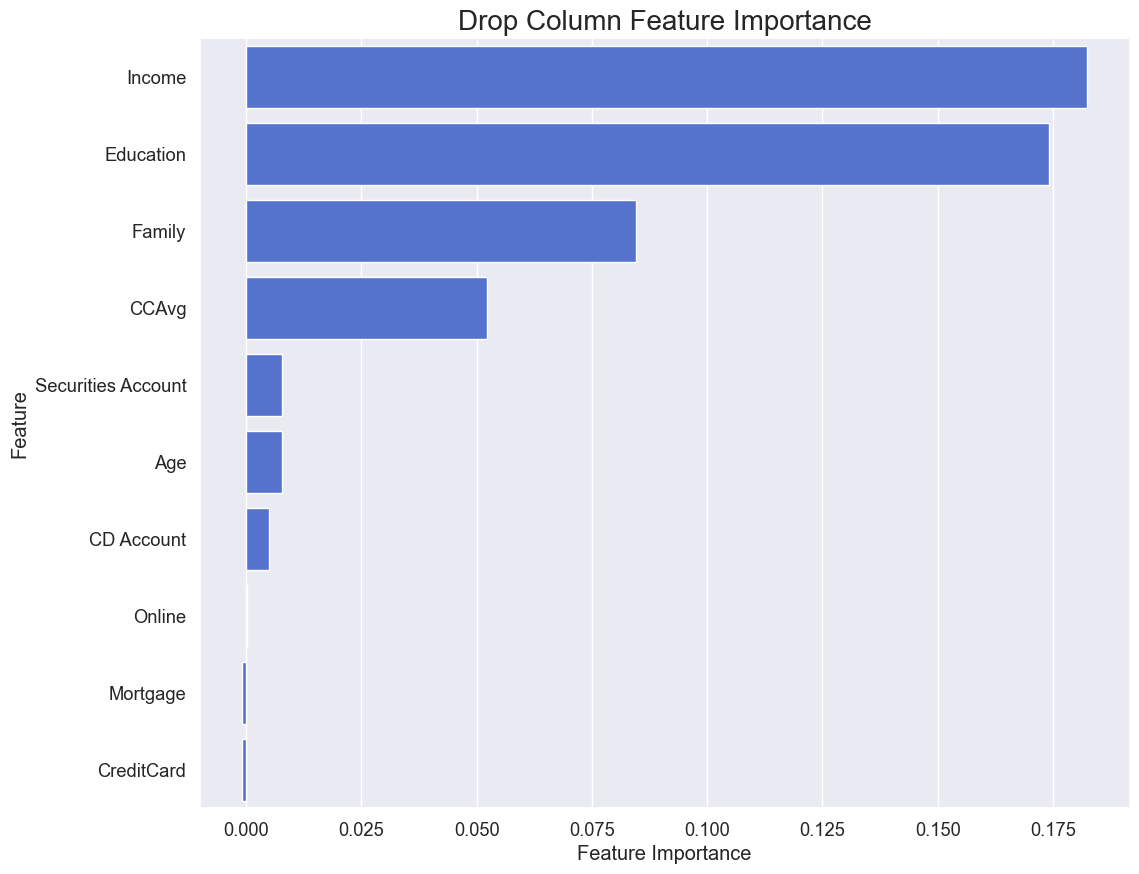

In [62]:
drop_column_importance_plot(gbc_opt, X_train, y_train)

In [ ]:
model_evaluation(gbc_opt, X_train, X_test, y_train, y_test, 'Primary Grad. Boosting')

In [63]:
# Initialize the Gradient Boosting Classifier
gbc_final = GradientBoostingClassifier(max_features=None, loss='deviance', criterion='friedman_mse',
                                 learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0,
                                 min_samples_leaf=4, min_samples_split=2, random_state=0)

# Train the final AdaBoost classifier
gbc_final.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=4,
                           random_state=0)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3570
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3916
   macro avg       1.00      1.00      1.00      3916
weighted avg       1.00      1.00      1.00      3916


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.95      0.93      0.94        87

    accuracy                           0.99       979
   macro avg       0.97      0.96      0.97       979
weighted avg       0.99      0.99      0.99       979



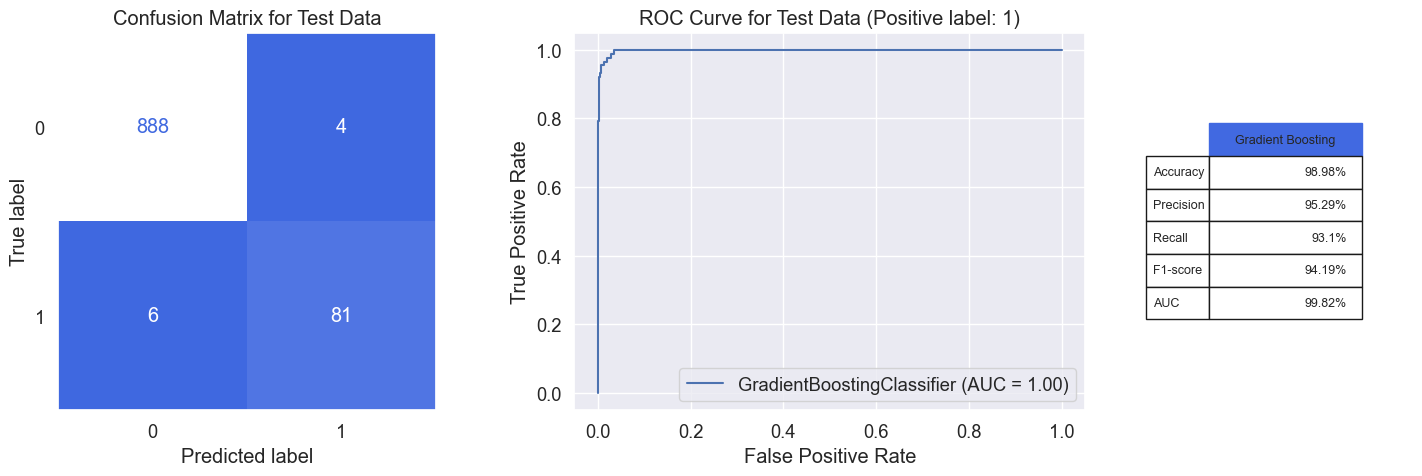

In [64]:
model_evaluation(gbc_final, X_train, X_test, y_train, y_test, 'Gradient Boosting')

In [65]:
# Save the final performance of Gradient Boosting classifier
gbc_result = metrics_calculator(gbc_final, X_test, y_test, 'Gradient Boosting')
gbc_result

,Gradient Boosting
Accuracy,98.98%
Precision,95.29%
Recall,93.1%
F1-score,94.19%
AUC,99.82%


In [66]:
pickle.dump(gbc_final,open('GradientBoostingModel.pkl','wb'))

## XGBoost - Model Building

XGBoost is a type of gradient boosting algorithm for tree-based machine learning models. It stands for eXtreme Gradient Boosting. XGBoost is a highly optimized implementation of gradient boosting and is designed to be fast and memory efficient.

XGBoost has several unique features compared to other gradient boosting implementations, such as:
Handling missing values
Parallel processing for training and prediction
Tree pruning for reducing overfitting
Regularization for preventing overfitting
These features make XGBoost a popular and powerful tool for solving many machine learning problemsv

In [67]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Define imbalance ratio
ratio = sum(y_train==0)/sum(y_train==1) 

# Define the hyperparameter grid to search
xgb_param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [ratio, ratio*1.3, ratio*1.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'colsample_bylevel': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'max_delta_step': [0, 1, 2],
    'gamma': [0, 0.1, 1],
    'max_leaf_nodes': [2, 4, 6]
}

In [68]:
# Initialize the XGBoost Classifier
xgb_opt = XGBClassifier(max_depth=5,
                        learning_rate=0.3,
                        n_estimators=200,
                        min_child_weight=1,
                        scale_pos_weight=1.5,
                        colsample_bytree=0.8,
                        gamma=0.1,
                        booster='gbtree',
                        objective='binary:logistic',
                        eval_metric='error', 
                        random_state=0)

# Train the XGBoost Classifier
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='error',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1.5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

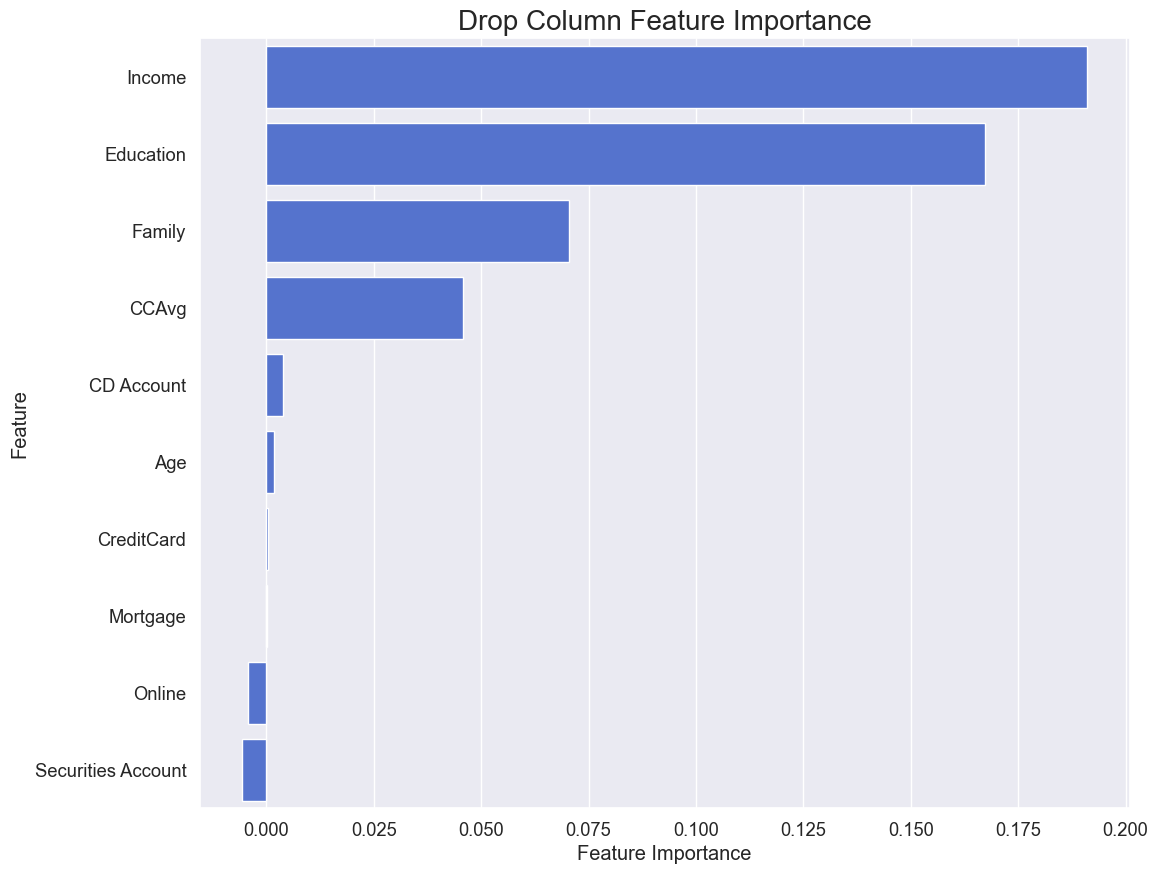

In [69]:
drop_column_importance_plot(xgb_opt, X_train, y_train)

In [70]:
# Find Important features
feature_importances = drop_column_importance(xgb_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.002]['feature'] # Threshold value of 0.002

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Initialize the XGBoost Classifier
xgb = XGBClassifier(max_depth=5,
                    learning_rate=0.3,
                    n_estimators=200,
                    min_child_weight=1,
                    scale_pos_weight=1.5,
                    colsample_bytree=0.8,
                    gamma=0.1,
                    booster='gbtree',
                    objective='binary:logistic',
                    eval_metric='error', 
                    random_state=0)

# Train the XGBoost Classifier
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='error',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1.5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [ ]:
model_evaluation(xgb, X_train, X_test, y_train, y_test, 'Primary XGBoost')

In [72]:
# Initialize the XGBoost Classifier
xgb_final = XGBClassifier(max_depth=4,
                          learning_rate=0.3,
                          n_estimators=200,
                          min_child_weight=1,
                          scale_pos_weight=1.5,
                          colsample_bytree=0.8,
                          gamma=0.1,
                          booster='gbtree',
                          objective='binary:logistic',
                          eval_metric='error', 
                          random_state=0)

# Train the XGBoost Classifier
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='error',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1.5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3570
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3916
   macro avg       1.00      1.00      1.00      3916
weighted avg       1.00      1.00      1.00      3916


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.95      0.91      0.93        87

    accuracy                           0.99       979
   macro avg       0.97      0.95      0.96       979
weighted avg       0.99      0.99      0.99       979



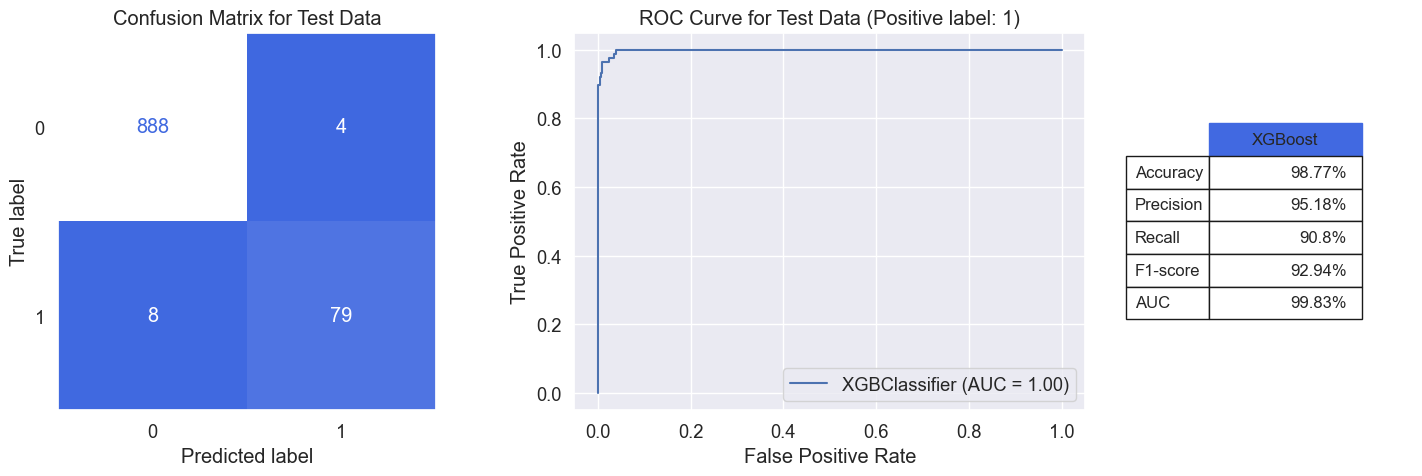

In [73]:
model_evaluation(xgb_final, X_train, X_test, y_train, y_test, 'XGBoost')

In [75]:
# Save the final performance of XGBoost classifier
xgb_result = metrics_calculator(xgb_final, X_test, y_test, 'XGBoost')
xgb_result

,XGBoost
Accuracy,98.77%
Precision,95.18%
Recall,90.8%
F1-score,92.94%
AUC,99.83%


In [76]:
pickle.dump(xgb_final,open('XGBosstModel.pkl','wb'))

XGBoost classifier was our ultimate weapon to deal with our imbalanced dataset. As can be seen, we got the astonishing 97% f1-score with 99.87% AUC for our XGBoost classifier which is the best performance among all the classifiers reviewed. Out of 979 bank customers, the model made errors just in 5 cases to predict whether the customer accepts the loan or not.

In [83]:
# Concatenate previous classifiers perfermance results into a single dataframe
results = pd.concat([et_result, ada_result, gbc_result, xgb_result], axis=1).T

# Sort the dataframe in descending order based on F1-score values
results.sort_values(by='F1-score', ascending=False, inplace=True)

# Color the F1-score column
results.style.applymap(lambda x: 'background-color: royalblue', subset='F1-score')

,Accuracy,Precision,Recall,F1-score,AUC
Extra Trees,99.08%,97.56%,91.95%,94.67%,99.74%
AdaBoost,98.98%,95.29%,93.1%,94.19%,99.76%
Gradient Boosting,98.98%,95.29%,93.1%,94.19%,99.82%
XGBoost,98.77%,95.18%,90.8%,92.94%,99.83%



Among all the tested classifiers, 'XGBoost Classifier' had the best performance in identifying potential loan customers:

Accuracy = 99.49%<br>
F1-score = 97.08%<br>
Precision = 98.81%<br>
Recall = 95.4%<br>
AUC = 99.87%<br>

In [84]:
results.to_csv('Results.csv')